<a href="https://colab.research.google.com/github/shlee0619/workStats/blob/main/1224.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/hwda02/data/Health.xlsx', engine = 'openpyxl')
df.head()

,Country Name,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality,Population Growth,Female Pop,Male Pop,Total Pop,Labor Force,Fertility Rate,Birth Rate
0,Argentina,7.80,706.90,73.76,180.64,92.80,1.11,51.07,48.93,37057452,16458321,2.56,19.41
1,Austria,9.60,2415.78,78.13,126.29,63.09,0.24,51.47,48.53,8011566,3899156,1.36,9.80
2,Australia,6.70,1745.93,79.23,97.97,56.11,1.19,50.11,49.89,19153000,9603052,1.76,13.00
3,Brazil,5.99,262.76,70.02,247.53,125.46,1.45,50.58,49.42,175287587,79593872,2.30,20.20
4,Cambodia,9.43,17.63,58.35,292.21,226.73,2.24,51.40,48.60,12152354,5579215,3.81,28.06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Name       38 non-null     object 
 1   Death Rate         38 non-null     float64
 2   Health Expend      38 non-null     float64
 3   Life Exp           38 non-null     float64
 4   Male Mortality     38 non-null     float64
 5   Female Mortality   38 non-null     float64
 6   Population Growth  38 non-null     float64
 7   Female Pop         38 non-null     float64
 8   Male Pop           38 non-null     float64
 9   Total Pop          38 non-null     int64  
 10  Labor Force        38 non-null     int64  
 11  Fertility Rate     38 non-null     float64
 12  Birth Rate         38 non-null     float64
dtypes: float64(10), int64(2), object(1)
memory usage: 4.0+ KB


In [ ]:
df.drop('Country Name', axis = 1).describe()

,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality,Population Growth,Female Pop,Male Pop,Total Pop,Labor Force,Fertility Rate,Birth Rate
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,3.800000e+01,3.800000e+01,38.000000,38.000000
mean,8.481842,1231.432368,72.562632,177.039474,112.393947,1.070000,50.311053,49.688947,1.045051e+08,4.963038e+07,2.395263,18.100526
std,2.660258,1266.610599,8.277978,94.000405,87.394331,1.194417,1.683078,1.683078,2.590919e+08,1.329950e+08,1.335806,9.391222
min,2.530000,5.370000,50.000000,87.190000,47.580000,-2.850000,41.560000,48.140000,4.363000e+05,1.887430e+05,1.260000,9.300000
25%,6.527500,161.195000,70.630000,107.057500,61.747500,0.410000,50.117500,48.870000,7.391079e+06,3.923451e+06,1.510000,11.125000
50%,8.695000,684.350000,76.075000,143.820000,71.955000,1.110000,50.565000,49.435000,3.391358e+07,1.601940e+07,1.870000,13.865000
75%,10.100000,2181.890000,78.085000,201.982500,114.107500,1.512500,51.130000,49.882500,6.265822e+07,2.861630e+07,2.802500,23.782500
max,15.960000,4788.310000,81.080000,493.450000,374.820000,4.680000,51.860000,58.440000,1.262645e+09,7.348526e+08,6.750000,45.960000


### 상관행렬

In [ ]:
cor_mat = df.drop('Country Name', axis = 1).corr()

In [ ]:
cor_mat = round(cor_mat, 2);cor_mat

,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality,Population Growth,Female Pop,Male Pop,Total Pop,Labor Force,Fertility Rate,Birth Rate
Death Rate,1.00,0.11,-0.45,0.46,0.52,-0.22,0.44,-0.44,-0.10,-0.11,0.40,0.27
Health Expend,0.11,1.00,0.63,-0.56,-0.51,-0.32,0.26,-0.26,-0.18,-0.15,-0.50,-0.60
Life Exp,-0.45,0.63,1.00,-0.92,-0.96,-0.51,0.16,-0.16,-0.15,-0.10,-0.90,-0.91
Male Mortality,0.46,-0.56,-0.92,1.00,0.95,0.36,0.04,-0.04,0.03,-0.01,0.74,0.77
Female Mortality,0.52,-0.51,-0.96,0.95,1.00,0.48,-0.07,0.07,0.08,0.04,0.85,0.85
Population Growth,-0.22,-0.32,-0.51,0.36,0.48,1.00,-0.67,0.67,0.05,0.02,0.65,0.70
Female Pop,0.44,0.26,0.16,0.04,-0.07,-0.67,1.00,-1.00,-0.25,-0.23,-0.24,-0.30
Male Pop,-0.44,-0.26,-0.16,-0.04,0.07,0.67,-1.00,1.00,0.25,0.23,0.24,0.30
Total Pop,-0.10,-0.18,-0.15,0.03,0.08,0.05,-0.25,0.25,1.00,0.98,0.01,0.06
Labor Force,-0.11,-0.15,-0.10,-0.01,0.04,0.02,-0.23,0.23,0.98,1.00,-0.04,0.01


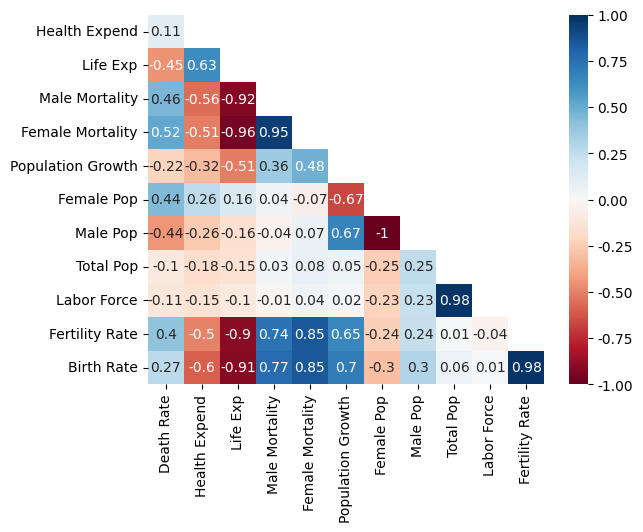

In [ ]:
mask = np.zeros_like(cor_mat)
mask[np.triu_indices_from(mask)] = 1
mask_new = mask[1:,:-1]
cor_mat_new = cor_mat.iloc[1:,:-1]
plt.rc('axes', unicode_minus=False)
sns.heatmap(cor_mat_new,
            cmap = 'RdBu',
            annot = True,
            mask = mask_new,
            vmax = 1,
            vmin = -1)
plt.show()

In [ ]:
cor_mat > 0.6

,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality,Population Growth,Female Pop,Male Pop,Total Pop,Labor Force,Fertility Rate,Birth Rate
Death Rate,True,False,False,False,False,False,False,False,False,False,False,False
Health Expend,False,True,True,False,False,False,False,False,False,False,False,False
Life Exp,False,True,True,False,False,False,False,False,False,False,False,False
Male Mortality,False,False,False,True,True,False,False,False,False,False,True,True
Female Mortality,False,False,False,True,True,False,False,False,False,False,True,True
Population Growth,False,False,False,False,False,True,False,True,False,False,True,True
Female Pop,False,False,False,False,False,False,True,False,False,False,False,False
Male Pop,False,False,False,False,False,True,False,True,False,False,False,False
Total Pop,False,False,False,False,False,False,False,False,True,True,False,False
Labor Force,False,False,False,False,False,False,False,False,True,True,False,False


### 데이터 준비

In [ ]:
df.columns

Index(['Country Name', 'Death Rate', 'Health Expend', 'Life Exp',
       'Male Mortality', 'Female Mortality', 'Population Growth', 'Female Pop',
       'Male Pop', 'Total Pop', 'Labor Force', 'Fertility Rate', 'Birth Rate'],
      dtype='object')

In [ ]:
# 데이터 분할
# 전체 데이터
X = df.drop('Country Name', axis = 1)

print("X 데이터: ", X.shape)

X 데이터:  (38, 12)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X)
X_scale = standard.transform(X)

### 주성분 분석

In [ ]:
# 주성분 분석
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scale)

PCA()

In [ ]:
pca.components_.shape
# 주성분 개수, 원본 데이터의 특성 개수

(12, 12)

### 설명된 분산

In [ ]:
# 설명된 분산
print(pca.explained_variance_)
print(np.sqrt(pca.explained_variance_))
print(pca.explained_variance_ratio_)

[5.74545868e+00 3.04353095e+00 1.88858205e+00 8.27011605e-01
 3.98734059e-01 2.73257407e-01 8.62156348e-02 2.14018809e-02
 2.07022696e-02 1.58821595e-02 3.54762784e-03 7.65681657e-34]
[2.39696864e+00 1.74457185e+00 1.37425691e+00 9.09401784e-01
 6.31453925e-01 5.22740287e-01 2.93624990e-01 1.46293817e-01
 1.43882833e-01 1.26024440e-01 5.95619664e-02 2.76709533e-17]
[4.66188533e-01 2.46953169e-01 1.53240210e-01 6.71040118e-02
 3.23534215e-02 2.21722019e-02 6.99556686e-03 1.73655612e-03
 1.67978942e-03 1.28868399e-03 2.87855768e-04 6.21276783e-35]


In [ ]:
exp_var = [round(x,5) for x in pca.explained_variance_]
print(exp_var)
exp_std = [round(x,5) for x in np.sqrt(pca.explained_variance_)]
print(exp_std)
prop_var = [round(x,5) for x in pca.explained_variance_ratio_]
print(prop_var)

[5.74546, 3.04353, 1.88858, 0.82701, 0.39873, 0.27326, 0.08622, 0.0214, 0.0207, 0.01588, 0.00355, 0.0]
[2.39697, 1.74457, 1.37426, 0.9094, 0.63145, 0.52274, 0.29362, 0.14629, 0.14388, 0.12602, 0.05956, 0.0]
[0.46619, 0.24695, 0.15324, 0.0671, 0.03235, 0.02217, 0.007, 0.00174, 0.00168, 0.00129, 0.00029, 0.0]


In [ ]:
pca_summary = pd.DataFrame({'var': exp_var,
                            'std': exp_std,
                            'prop_var': prop_var})
pca_summary

,var,std,prop_var
0,5.74546,2.39697,0.46619
1,3.04353,1.74457,0.24695
2,1.88858,1.37426,0.15324
3,0.82701,0.90940,0.06710
4,0.39873,0.63145,0.03235
5,0.27326,0.52274,0.02217
6,0.08622,0.29362,0.00700
7,0.02140,0.14629,0.00174
8,0.02070,0.14388,0.00168
9,0.01588,0.12602,0.00129


In [ ]:
# 누적합
pca_summary['cum_var'] = pca_summary['prop_var'].cumsum()

In [ ]:
pca_summary.T

,0,1,2,3,4,5,6,7,8,9,10,11
var,5.74546,3.04353,1.88858,0.82701,0.39873,0.27326,0.08622,0.02140,0.02070,0.01588,0.00355,0.0
std,2.39697,1.74457,1.37426,0.90940,0.63145,0.52274,0.29362,0.14629,0.14388,0.12602,0.05956,0.0
prop_var,0.46619,0.24695,0.15324,0.06710,0.03235,0.02217,0.00700,0.00174,0.00168,0.00129,0.00029,0.0
cum_var,0.46619,0.71314,0.86638,0.93348,0.96583,0.98800,0.99500,0.99674,0.99842,0.99971,1.00000,1.0


### 주성분 개수 찾는 다른 방법

In [ ]:
print(pca_summary['var'])
print(pca_summary[pca_summary['var'] > 1])
# 주성분 3개
print(pca_summary[pca_summary['var'] > 0.7])
# 주성분 4개

0     5.74546
1     3.04353
2     1.88858
3     0.82701
4     0.39873
5     0.27326
6     0.08622
7     0.02140
8     0.02070
9     0.01588
10    0.00355
11    0.00000
Name: var, dtype: float64
       var      std  prop_var  cum_var
0  5.74546  2.39697   0.46619  0.46619
1  3.04353  1.74457   0.24695  0.71314
2  1.88858  1.37426   0.15324  0.86638
       var      std  prop_var  cum_var
0  5.74546  2.39697   0.46619  0.46619
1  3.04353  1.74457   0.24695  0.71314
2  1.88858  1.37426   0.15324  0.86638
3  0.82701  0.90940   0.06710  0.93348


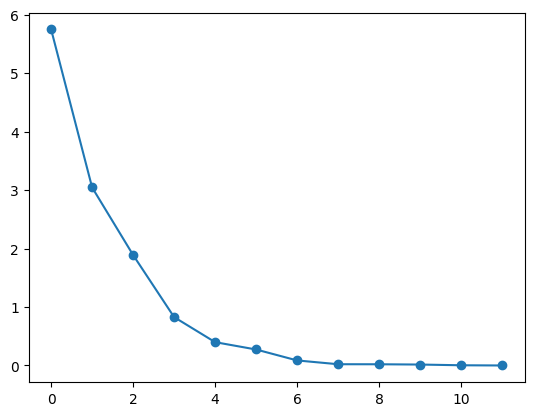

In [ ]:
# 스크리 플랏: 분산 (개별 고유값) 시각화
plt.plot(pca_summary['var'], marker = 'o')
plt.show()
# 기울기가 완만해지는 지점 = 3 ~ 4개

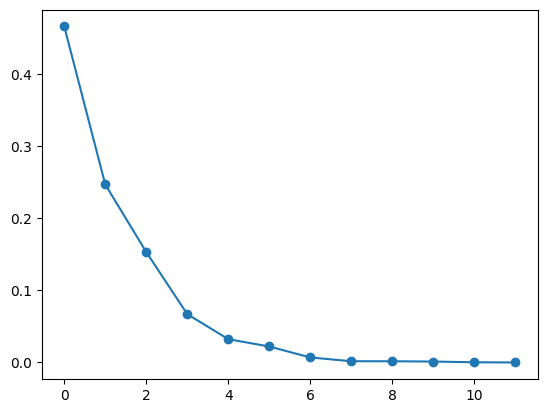

In [ ]:
# 스크리 플랏: 분산 비율 시각화
plt.plot(pca_summary['prop_var'], marker = 'o')
plt.show()
# 기울기가 완만해지는 지점 = 3 ~ 4개

### 회전 속성(가중치)

In [ ]:
# 회전 속성(가중치)
pca.components_

array([[-1.26144749e-01,  2.78030708e-01,  4.08137772e-01,
        -3.62693670e-01, -3.90288381e-01, -2.90204549e-01,
         1.47899528e-01, -1.47899528e-01, -6.62348543e-02,
        -4.53622154e-02, -3.95247500e-01, -4.07069618e-01],
       [-4.24982976e-01, -8.08904879e-02,  1.08991506e-01,
        -2.12669363e-01, -1.69845308e-01,  2.69997297e-01,
        -4.96239218e-01,  4.96239218e-01,  2.78698168e-01,
         2.79519077e-01, -7.23064513e-02, -2.13142058e-02],
       [ 1.65146373e-01, -6.21063692e-02, -8.31684289e-02,
         7.59440505e-02,  6.90849391e-02, -2.73858717e-01,
         1.85012381e-01, -1.85012381e-01,  6.28251327e-01,
         6.33222050e-01, -8.33048487e-02, -7.31088749e-02],
       [ 5.03973414e-01,  7.67432056e-01,  2.63929741e-02,
        -1.38910093e-01,  6.71373537e-02,  1.90297677e-01,
        -1.71418475e-01,  1.71418475e-01,  8.39464948e-02,
         7.85898825e-02,  1.54628376e-01,  2.10641641e-02],
       [-4.88363830e-01,  3.00726266e-01,  7.0851678

In [ ]:
pca_rotation = pd.DataFrame(pca.components_.T, index = X.columns)
pca_rotation

,0,1,2,3,4,5,6,7,8,9,10,11
Death Rate,-0.126145,-0.424983,0.165146,0.503973,-0.488364,-0.208530,0.439808,0.090886,0.122432,-0.099042,0.117218,-7.803392e-17
Health Expend,0.278031,-0.080890,-0.062106,0.767432,0.300726,0.268738,-0.381190,0.027615,-0.113210,-0.037186,0.020546,-9.348373e-17
Life Exp,0.408138,0.108992,-0.083168,0.026393,0.070852,-0.063321,0.077499,-0.217095,0.866220,0.031854,0.020328,-7.129325e-17
Male Mortality,-0.362694,-0.212669,0.075944,-0.138910,-0.036447,0.593650,-0.168148,0.255436,0.353982,-0.465020,-0.096666,-1.643205e-16
Female Mortality,-0.390288,-0.169845,0.069085,0.067137,-0.001345,0.378620,0.019350,-0.521694,0.081871,0.621795,0.017939,8.753843e-17
Population Growth,-0.290205,0.269997,-0.273859,0.190298,0.525391,0.095473,0.652853,0.116203,0.008817,-0.078857,-0.022449,1.076963e-16
Female Pop,0.147900,-0.496239,0.185012,-0.171418,0.389214,-0.078719,0.096557,0.011189,-0.027940,0.014412,-0.011713,7.071068e-01
Male Pop,-0.147900,0.496239,-0.185012,0.171418,-0.389214,0.078719,-0.096557,-0.011189,0.027940,-0.014412,0.011713,7.071068e-01
Total Pop,-0.066235,0.278698,0.628251,0.083946,0.101260,-0.028055,-0.034968,0.548382,0.170282,0.413413,-0.057456,1.270372e-16
Labor Force,-0.045362,0.279519,0.633222,0.078590,0.111893,-0.029667,0.063967,-0.532139,-0.090049,-0.450248,0.034185,-2.342951e-16


In [ ]:
# 주성분 3개
round(pca_rotation, 5).iloc[:, 0:3]
# PC1: 남성 사망률, 여성사망률, 출산율, 출생률 관련 특성
# PC2: 여성인구, 사망률 관련 특성
# PC3: 총인구, 노동인구 관련 특성

,0,1,2
Death Rate,-0.12614,-0.42498,0.16515
Health Expend,0.27803,-0.08089,-0.06211
Life Exp,0.40814,0.10899,-0.08317
Male Mortality,-0.36269,-0.21267,0.07594
Female Mortality,-0.39029,-0.16985,0.06908
Population Growth,-0.29020,0.27000,-0.27386
Female Pop,0.14790,-0.49624,0.18501
Male Pop,-0.14790,0.49624,-0.18501
Total Pop,-0.06623,0.27870,0.62825
Labor Force,-0.04536,0.27952,0.63322


In [ ]:
# 주성분 4개
round(pca_rotation, 5).iloc[:, 0:4]
# PC1: 남성 사망률, 여성사망률, 출산율, 출생률 관련 특성
# PC2: 여성인구, 사망률 관련 특성
# PC3: 총인구, 노동인구 관련 특성
# PC4: 인구증가률, 남성인구 관련 특성

,0,1,2,3
Death Rate,-0.12614,-0.42498,0.16515,0.50397
Health Expend,0.27803,-0.08089,-0.06211,0.76743
Life Exp,0.40814,0.10899,-0.08317,0.02639
Male Mortality,-0.36269,-0.21267,0.07594,-0.13891
Female Mortality,-0.39029,-0.16985,0.06908,0.06714
Population Growth,-0.29020,0.27000,-0.27386,0.19030
Female Pop,0.14790,-0.49624,0.18501,-0.17142
Male Pop,-0.14790,0.49624,-0.18501,0.17142
Total Pop,-0.06623,0.27870,0.62825,0.08395
Labor Force,-0.04536,0.27952,0.63322,0.07859


### 주성분 분포 시각화

In [ ]:
# 바이플랏
def biplot(score,coeff,pcx,pcy,labels = None):
  pca1 = pcx-1
  pca2 = pcy-1
  xs = score[:,pca1]
  ys = score[:,pca2]
  n = score.shape[1]
  scalex = 1.0/(xs.max()- xs.min())
  scaley = 1.0/(ys.max()- ys.min())
  plt.scatter(xs*scalex,ys*scaley)
  for i in range(n):
    plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2], color = 'r', alpha = 0.3)
    if labels is None:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color = 'r', ha = 'center', va = 'center')
    else:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color = 'r', ha = 'center', va = 'center')
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(pcx))
  plt.ylabel("PC{}".format(pcy))
  plt.grid()

In [ ]:
# 주성분 점수
scores = pca.transform(X_scale)

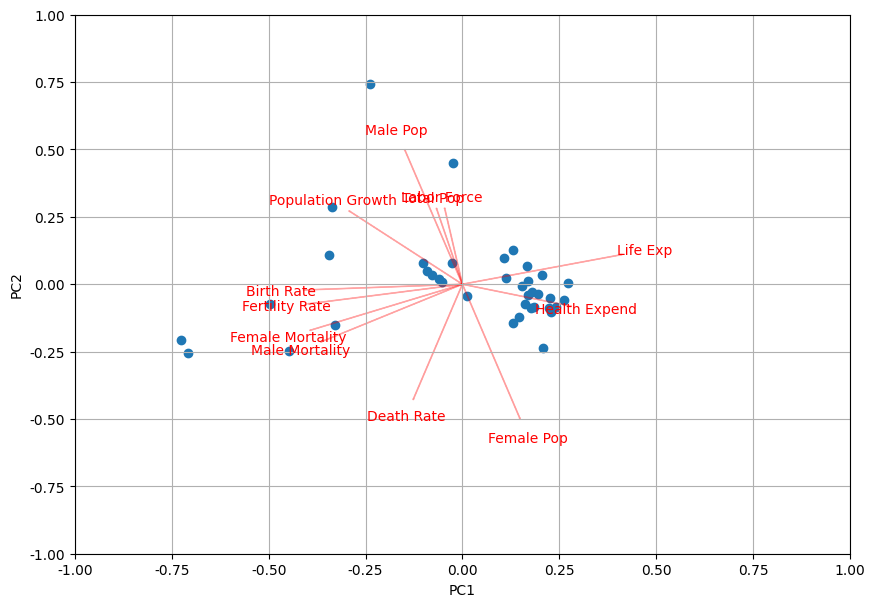

In [ ]:
# 주성분 분포 시각화: 모여있는 변수들이 주성분
plt.figure(figsize=(10,7))
biplot(scores, pca.components_.T, 1, 2, labels = X.columns)
plt.show()
# PC1: 남성 사망률, 여성사망률, 출산율, 출생률 관련 특성
# PC2: 여성인구, 사망률 관련 특성
# PC3: 총인구, 노동인구 관련 특성
# PC4: 인구증가률, 남성인구 관련 특성

#### 주성분 점수

In [ ]:
pca_scores = pd.DataFrame(scores)

In [ ]:
pca_scores

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.097854,-0.409961,-0.228518,-0.639682,0.375053,-0.295251,0.070409,0.058192,0.133048,-0.110958,-0.029420,1.447063e-16
1,2.036138,-0.979362,-0.002034,0.424862,-0.052382,0.122724,0.126159,0.032981,-0.052413,0.000994,0.007313,8.970339e-17
2,1.482262,0.652202,-0.710550,-0.007272,0.255619,-0.077216,0.081048,-0.088645,0.035176,0.106203,-0.053501,1.150422e-16
3,-0.695572,0.312542,0.265037,-1.136187,0.568753,0.464536,-0.076737,0.159178,0.029585,-0.163600,-0.010749,3.450928e-17
4,-2.910229,-1.431576,-0.186157,-0.596646,0.689264,0.123767,0.340752,0.053701,-0.520860,0.030870,-0.071374,3.035354e-16
5,1.814621,0.314260,-0.452444,0.135277,0.226038,0.126443,0.034792,-0.104858,-0.040944,0.145100,-0.060059,1.204962e-16
6,-0.210979,4.276263,5.810424,-0.081200,0.060888,-0.182487,0.260764,-0.400070,-0.092621,-0.206123,0.019869,-6.792457e-16
7,-0.534996,0.190467,-0.442084,-1.318751,0.531143,0.256016,-0.117098,0.119208,0.025029,-0.169610,0.017624,8.899878e-17
8,-6.289319,-2.438359,-0.019850,1.239481,-0.235444,-1.083359,0.054447,0.059800,-0.001793,-0.210375,0.058807,-1.221568e-16
9,1.837009,-2.253935,1.085085,-1.185048,-2.102011,-0.356555,-0.791460,-0.031166,-0.198648,0.008458,0.021695,-1.127704e-16


In [ ]:
# 주성분 3개
pca_scores3 = pca_scores.iloc[:,0:3]
pca_scores3.columns = ['PC1', 'PC2', 'PC3']
pca_scores3.head()

,PC1,PC2,PC3
0,0.097854,-0.409961,-0.228518
1,2.036138,-0.979362,-0.002034
2,1.482262,0.652202,-0.710550
3,-0.695572,0.312542,0.265037
4,-2.910229,-1.431576,-0.186157


In [ ]:
new_data3 = pd.concat([df['Country Name'], pca_scores3], axis = 1)
new_data3.head()

,Country Name,PC1,PC2,PC3
0,Argentina,0.097854,-0.409961,-0.228518
1,Austria,2.036138,-0.979362,-0.002034
2,Australia,1.482262,0.652202,-0.710550
3,Brazil,-0.695572,0.312542,0.265037
4,Cambodia,-2.910229,-1.431576,-0.186157


In [ ]:
# 주성분 4개
pca_scores4 = pca_scores.iloc[:,0:4]
pca_scores4.columns = ['PC1', 'PC2', 'PC3', 'PC4']
pca_scores4.head()

,PC1,PC2,PC3,PC4
0,0.097854,-0.409961,-0.228518,-0.639682
1,2.036138,-0.979362,-0.002034,0.424862
2,1.482262,0.652202,-0.710550,-0.007272
3,-0.695572,0.312542,0.265037,-1.136187
4,-2.910229,-1.431576,-0.186157,-0.596646


In [ ]:
new_data4 = pd.concat([df['Country Name'], pca_scores4], axis = 1)
new_data4.head()

,Country Name,PC1,PC2,PC3,PC4
0,Argentina,0.097854,-0.409961,-0.228518,-0.639682
1,Austria,2.036138,-0.979362,-0.002034,0.424862
2,Australia,1.482262,0.652202,-0.710550,-0.007272
3,Brazil,-0.695572,0.312542,0.265037,-1.136187
4,Cambodia,-2.910229,-1.431576,-0.186157,-0.596646


## 주성분 데이터를 이용하여 다른 모델 적용

### KMC - 원데이터

In [ ]:
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters = 3, n_init = 'auto', random_state=42)
kmc.fit(X_scale)

KMeans(n_clusters=3, random_state=42)

In [ ]:
np.unique(kmc.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([30,  6,  2]))

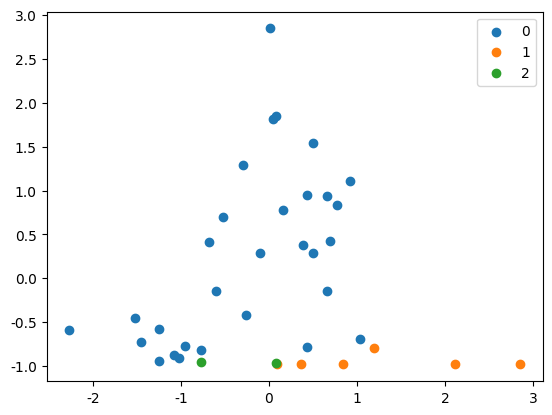

In [ ]:
for label in range(0,3):
  data = X_scale[kmc.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['0','1','2'])
plt.show()

In [ ]:
kmc_label = kmc.labels_
X_scale_new = pd.DataFrame(X_scale)

In [ ]:
X_scale_new['cluster'] = kmc_label
X_scale_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,cluster
0,-0.259747,-0.419682,0.146587,0.038817,-0.227211,0.033939,0.456981,-0.456981,-0.263818,-0.252771,0.124979,0.141308,0
1,0.425961,0.947604,0.681580,-0.547133,-0.571728,-0.704228,0.697831,-0.697831,-0.377429,-0.348472,-0.785414,-0.895724,0
2,-0.678792,0.411653,0.816246,-0.852452,-0.652668,0.101816,-0.121059,0.121059,-0.333850,-0.305009,-0.481949,-0.550407,0
3,-0.949266,-0.775041,-0.311279,0.759962,0.151514,0.322417,0.161940,-0.161940,0.276862,0.228322,-0.072272,0.226558,0
4,0.361200,-0.971171,-1.739968,1.241660,1.325839,0.992706,0.655683,-0.655683,-0.361233,-0.335670,1.073305,1.074744,1


### KMC - 주성분데이터

In [ ]:
# 데이터 분할
# 전체 데이터
X = new_data3.drop('Country Name', axis = 1)

print("X 데이터: ", X.shape)

X 데이터:  (38, 3)


In [ ]:
# 주성분 데이터로 KMC
# 모델
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters = 3, n_init = 'auto', random_state=42)
kmc.fit(X)

KMeans(n_clusters=3, random_state=42)

In [ ]:
np.unique(kmc.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([30,  6,  2]))

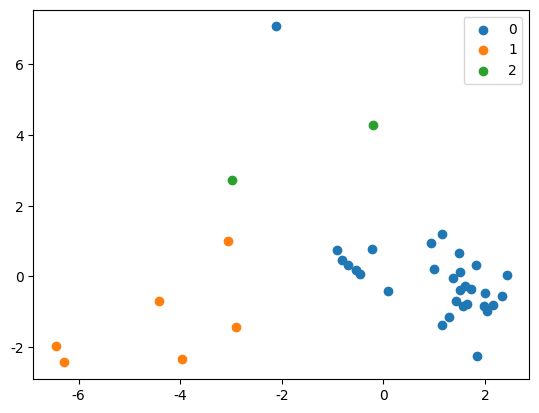

In [ ]:
for label in range(0,3):
  data = X[kmc.labels_ == label]
  plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.legend(['0','1','2'])
plt.show()

In [ ]:
kmc_label = kmc.labels_

In [ ]:
X['cluster'] = kmc_label
X.head()

,PC1,PC2,PC3,cluster
0,0.097854,-0.409961,-0.228518,0
1,2.036138,-0.979362,-0.002034,0
2,1.482262,0.652202,-0.710550,0
3,-0.695572,0.312542,0.265037,0
4,-2.910229,-1.431576,-0.186157,1


### 로지스틱 회귀 - 원데이터

In [ ]:
# 로지스틱 회귀분석
X_logit = X_scale_new.drop('cluster', axis = 1)
y = X_scale_new['cluster']

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_validate
score = cross_validate(lr, X_logit, y)
print(np.mean(score['test_score']))
print(np.mean(score['fit_time']))

0.9464285714285715
0.008049678802490235


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


### 로지스틱 회귀 - 주성분데이터

In [ ]:
# 로지스틱 회귀분석
X_pca = X.drop('cluster', axis = 1)
y = X['cluster']

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_validate
score = cross_validate(lr, X_pca, y)
print(np.mean(score['test_score']))
print(np.mean(score['fit_time']))

0.975
0.005839300155639648


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


# EDA

## AutoViz

In [ ]:
!pip install autoviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 57.8 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hwda02/data/auto-mpg.csv', header = None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model_year', 'origin', 'car_name']

Shape of your Data Set loaded: (398, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    9 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variables 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
mpg,float64,0.000000,NA,9.000000,46.600000,Column has 1 outliers greater than upper bound (46.25) or lower than lower bound(0.25). Cap them or remove them.
cylinders,int64,0.000000,1,3.000000,8.000000,"Column has a high correlation with ['displacement', 'weight']. Consider dropping one of them."
displacement,float64,0.000000,NA,68.000000,455.000000,Column has a high correlation with ['mpg']. Consider dropping one of them.
horsepower,object,0.000000,23,,,59 rare categories: Too many to list. Group them into a single category or drop the categories.
weight,float64,0.000000,NA,1613.000000,5140.000000,"Column has a high correlation with ['mpg', 'displacement']. Consider dropping one of them."
acceleration,float64,0.000000,NA,8.000000,24.800000,Column has 7 outliers greater than upper bound (22.20) or lower than lower bound(8.80). Cap them or remove them.
model_year,int64,0.000000,3,70.000000,82.000000,No issue
origin,int64,0.000000,0,1.000000,3.000000,No issue
car_name,object,0.000000,76,,,Possible high cardinality column with 305 unique values: Use hash encoding or text embedding to reduce dimension.


Number of All Scatter Plots = 10


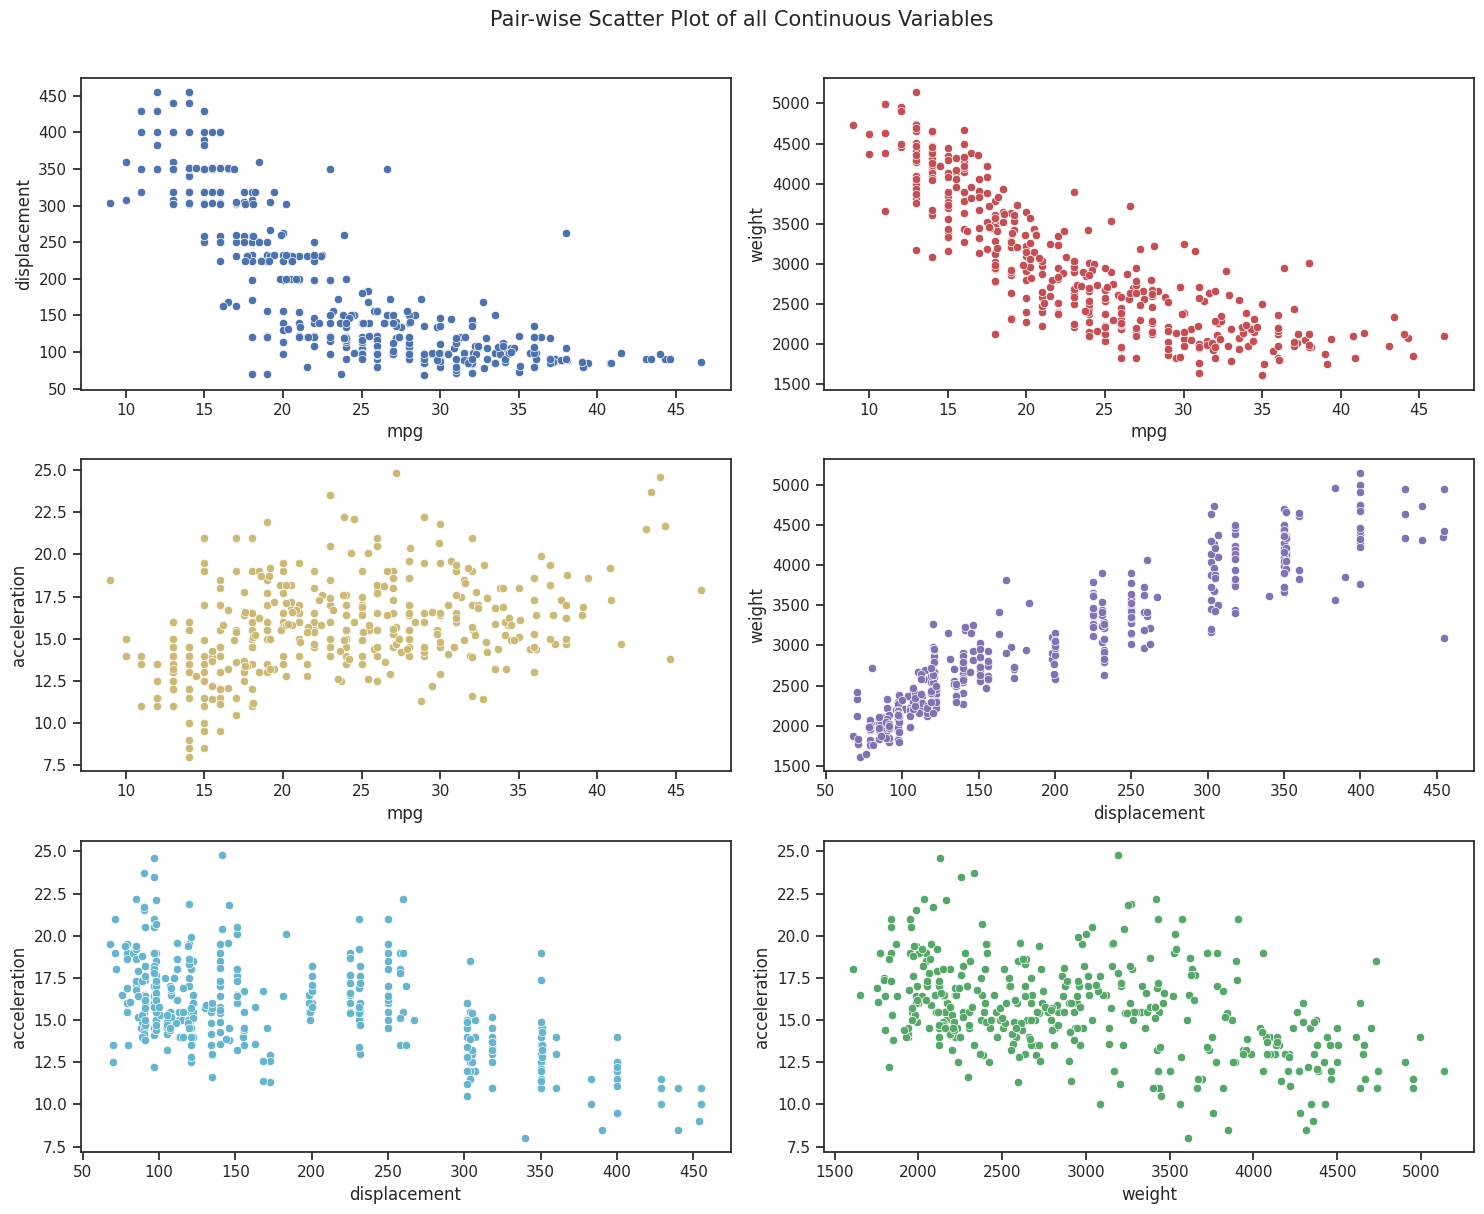

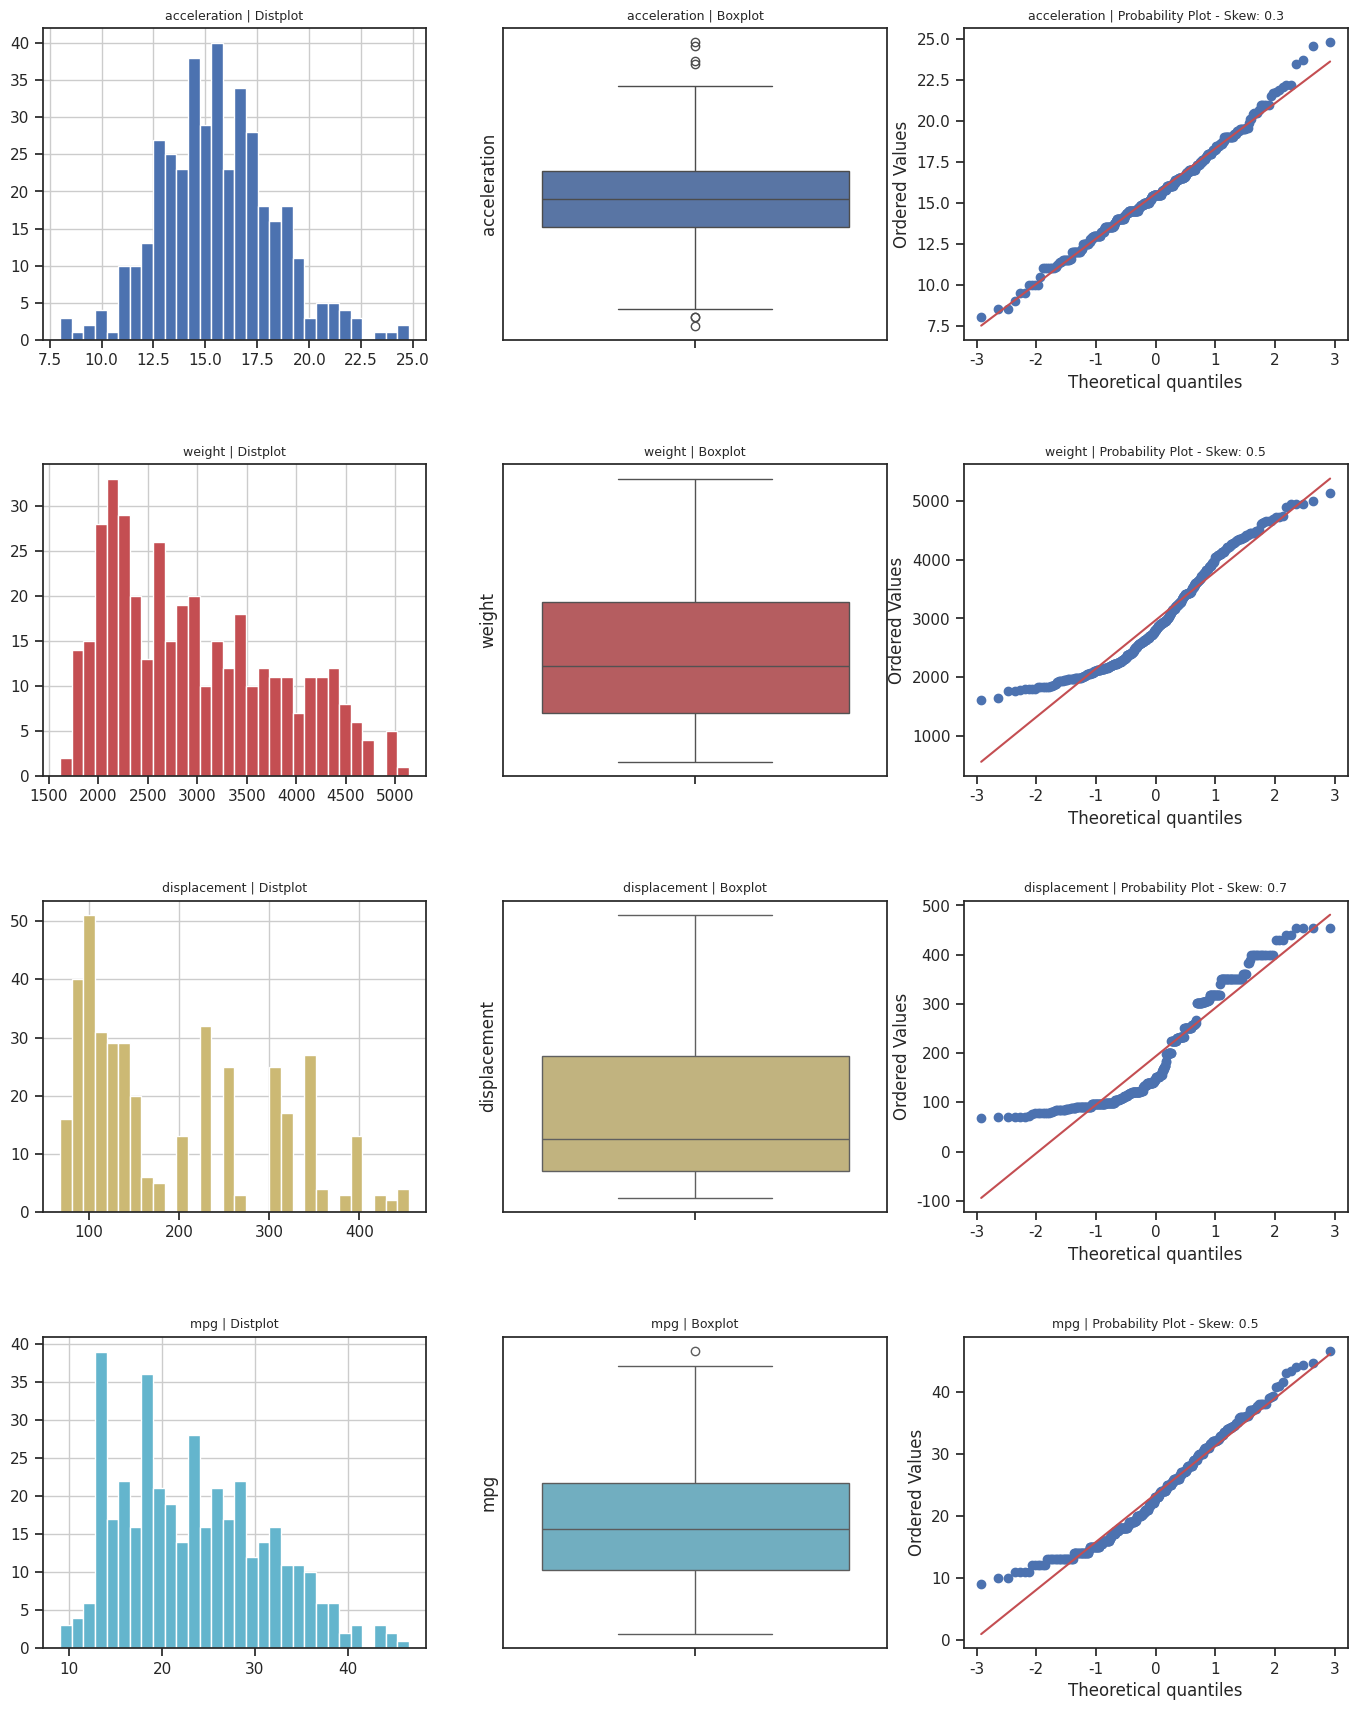

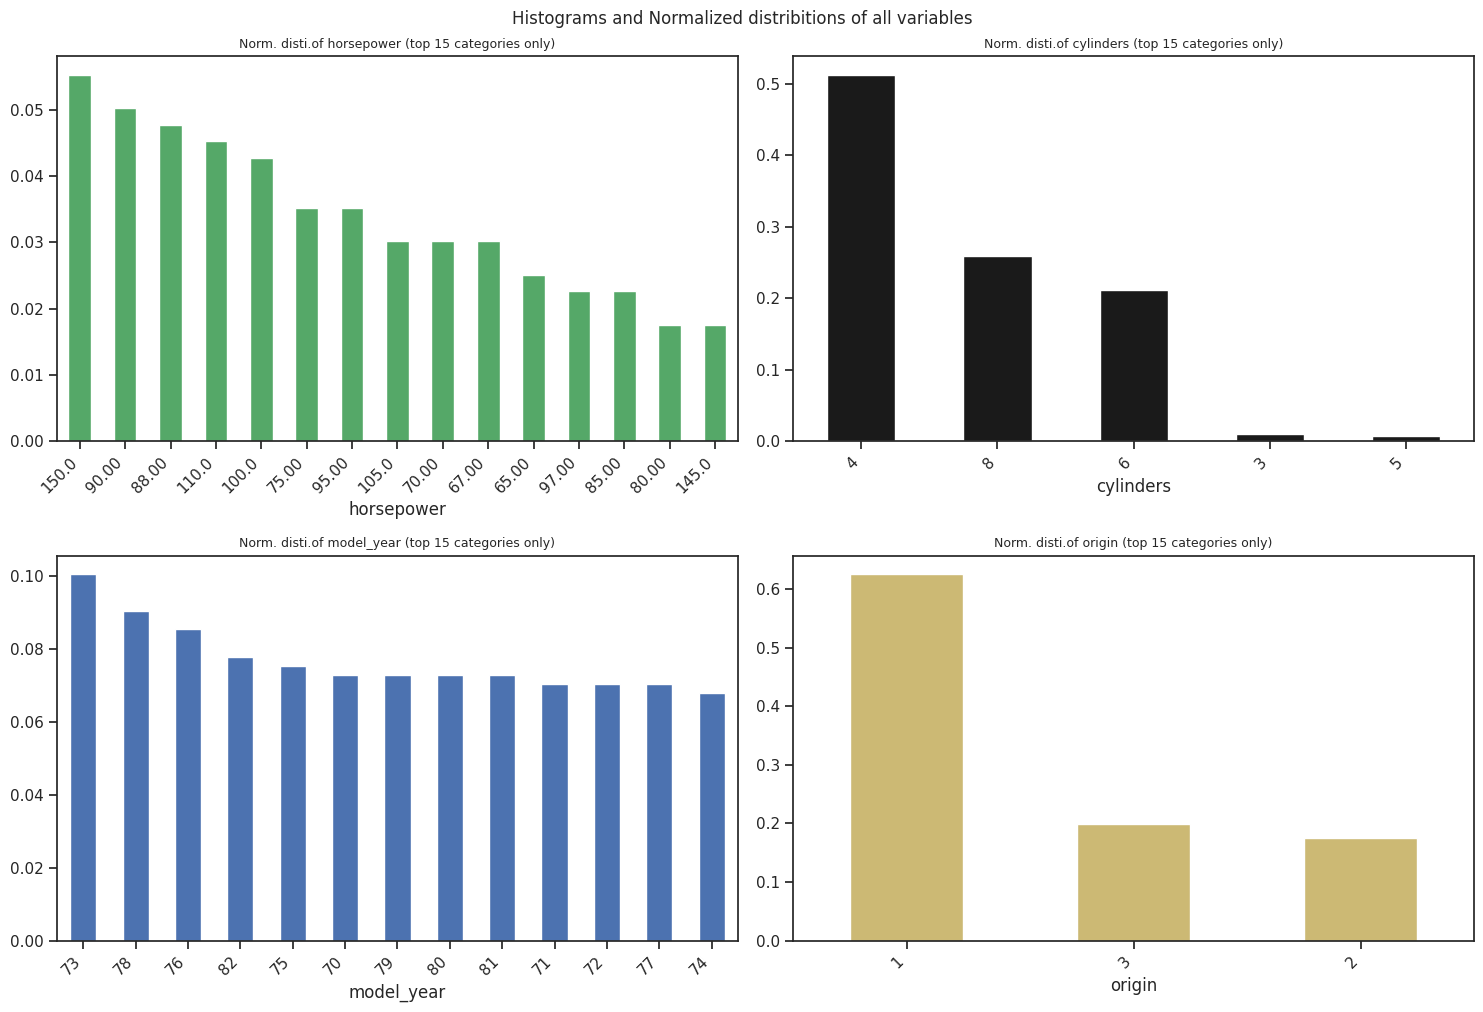

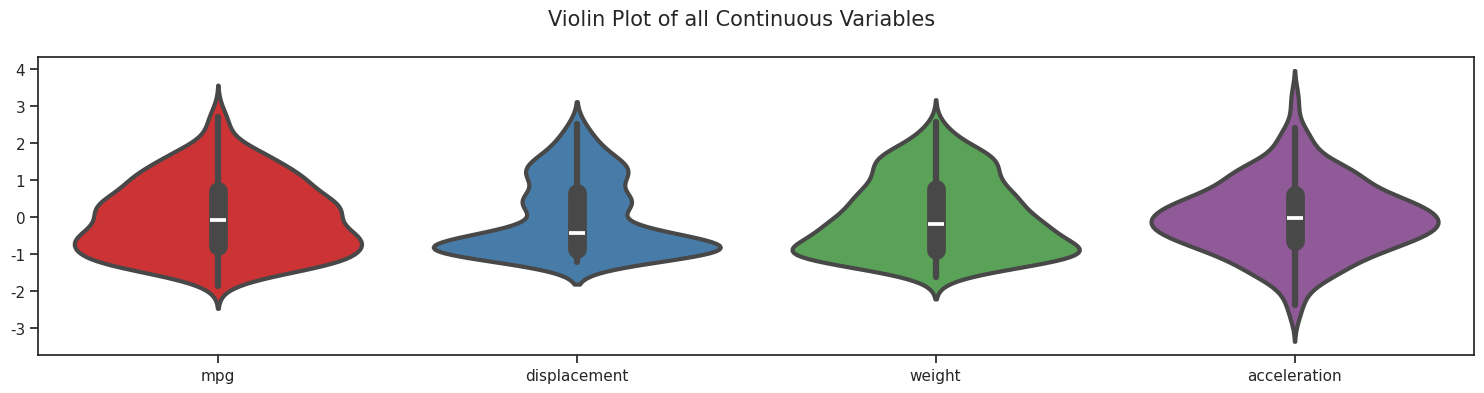

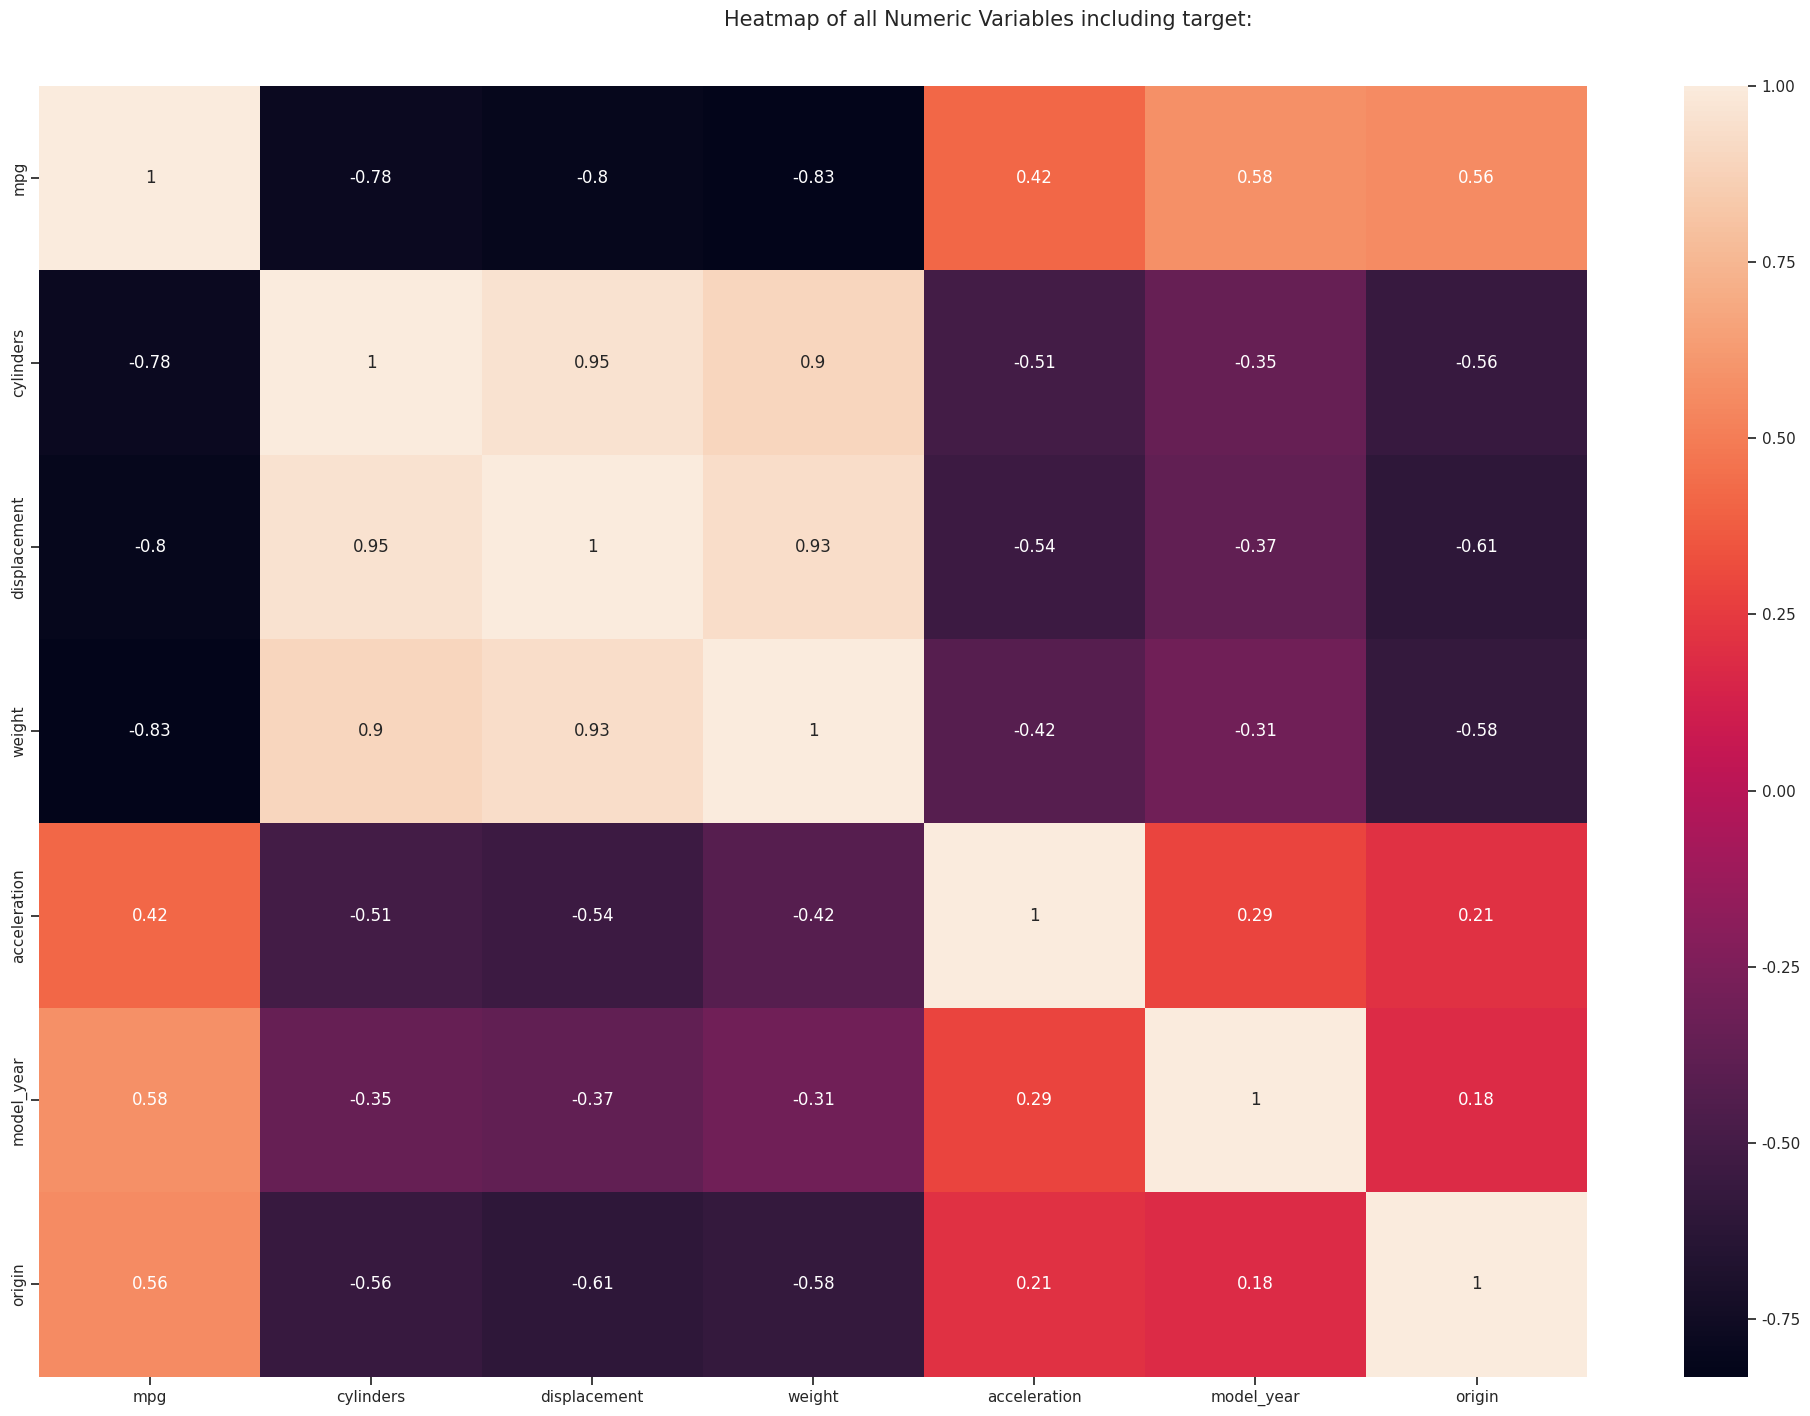

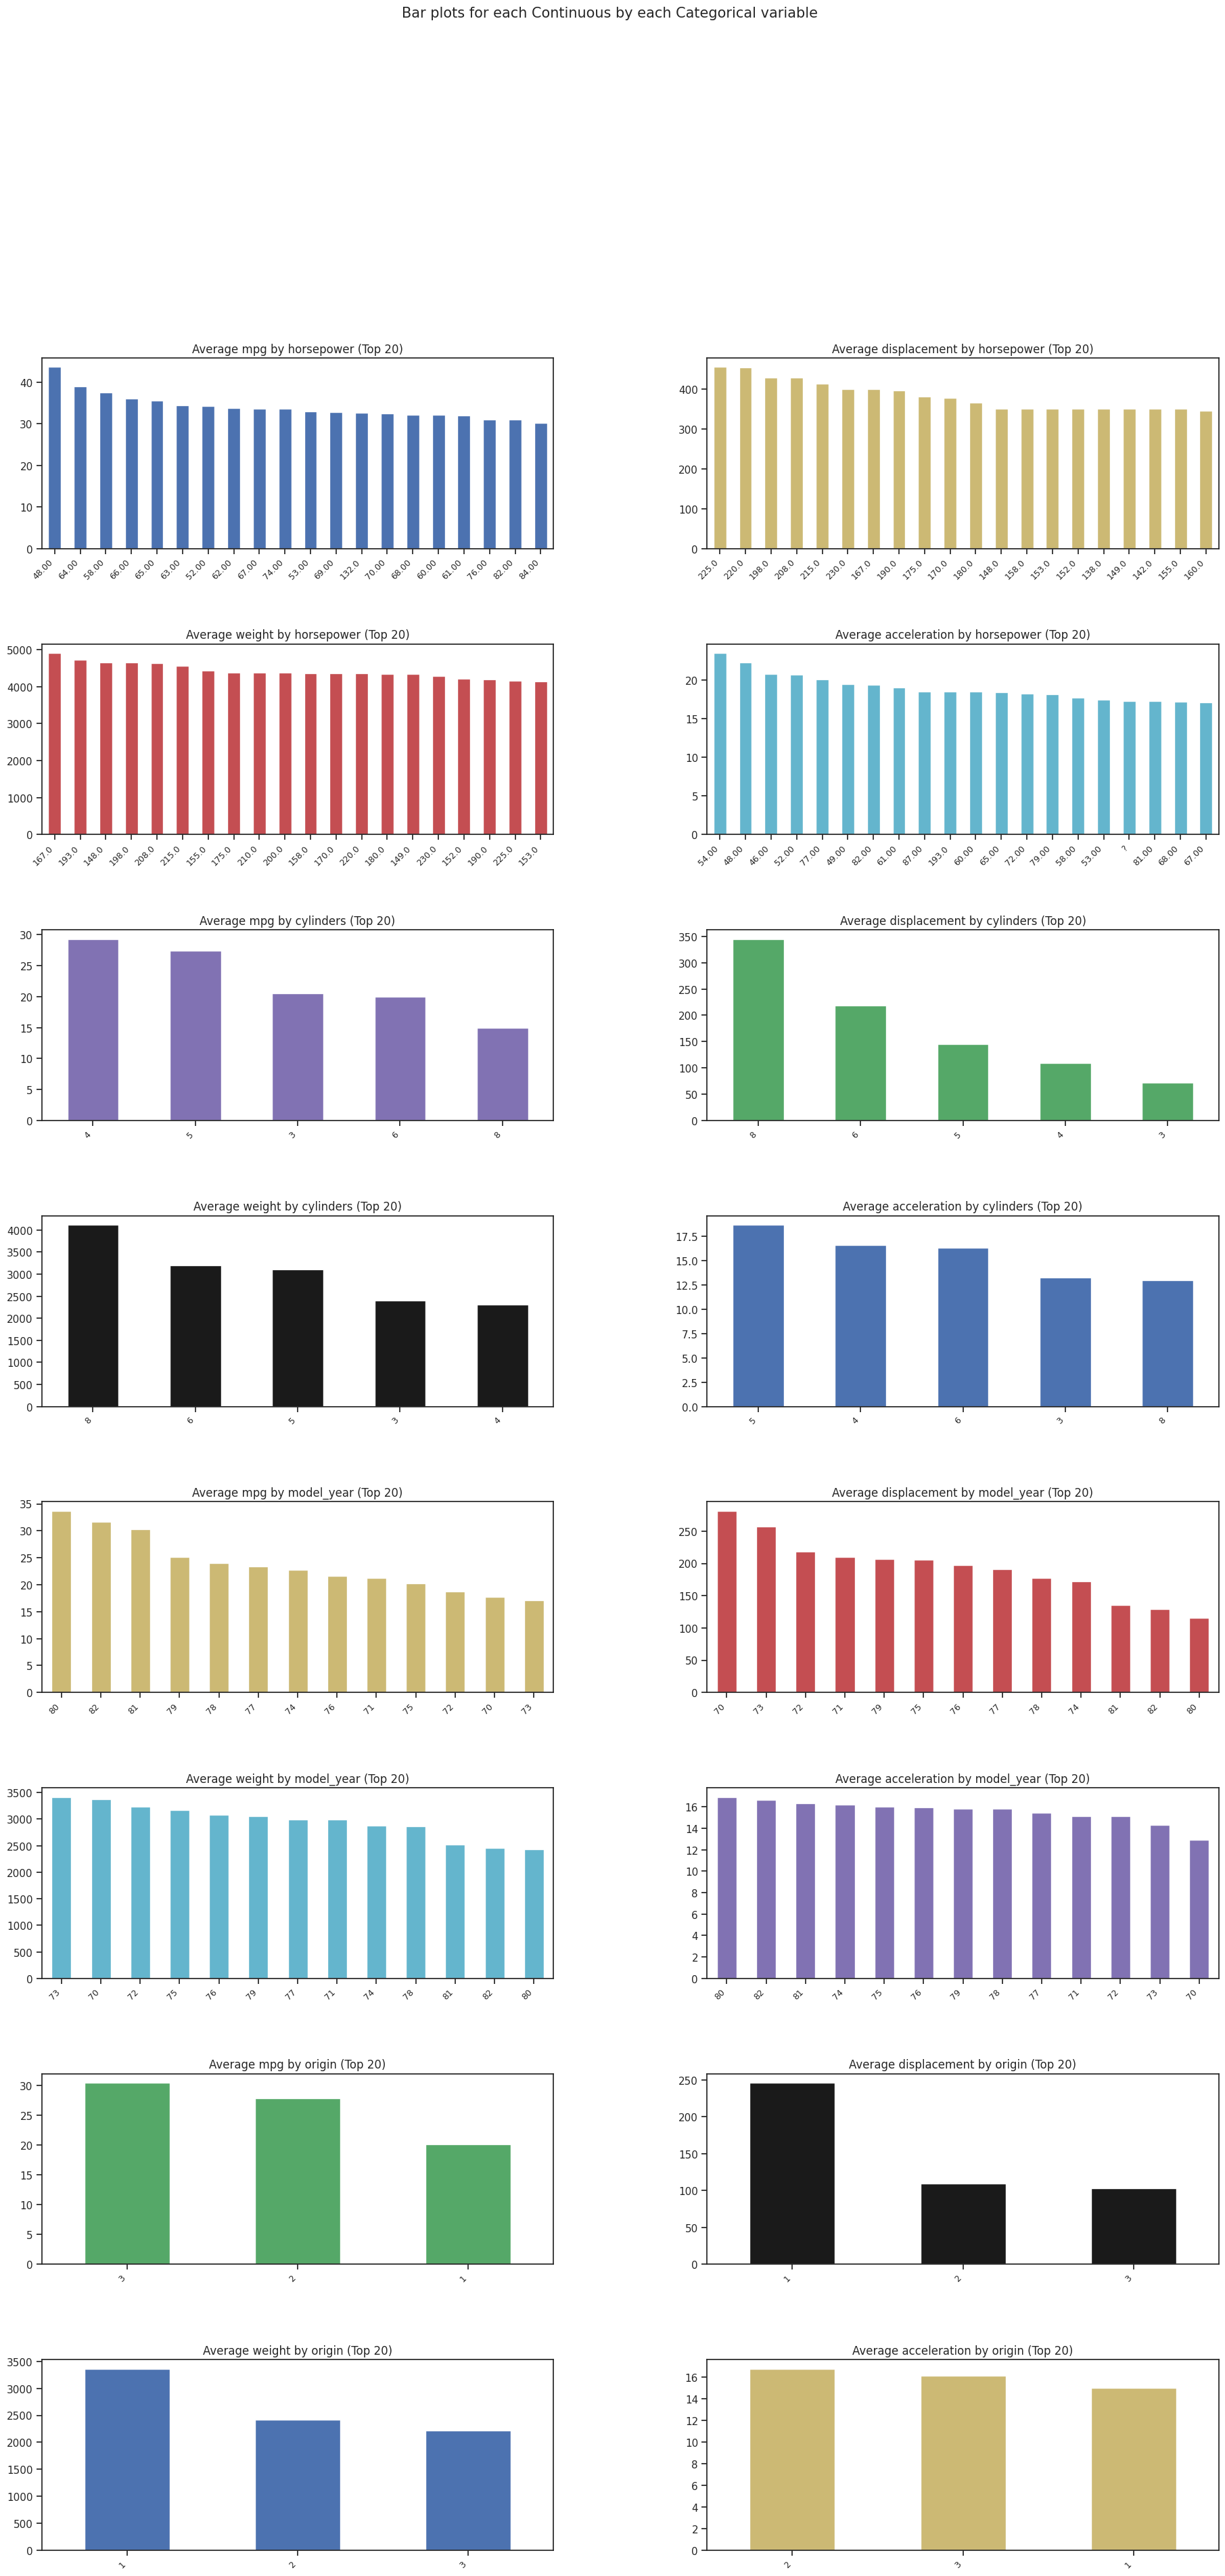

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt


**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt_tab')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt_tab/english/

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

Could not draw wordcloud plot for car_name. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextB

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


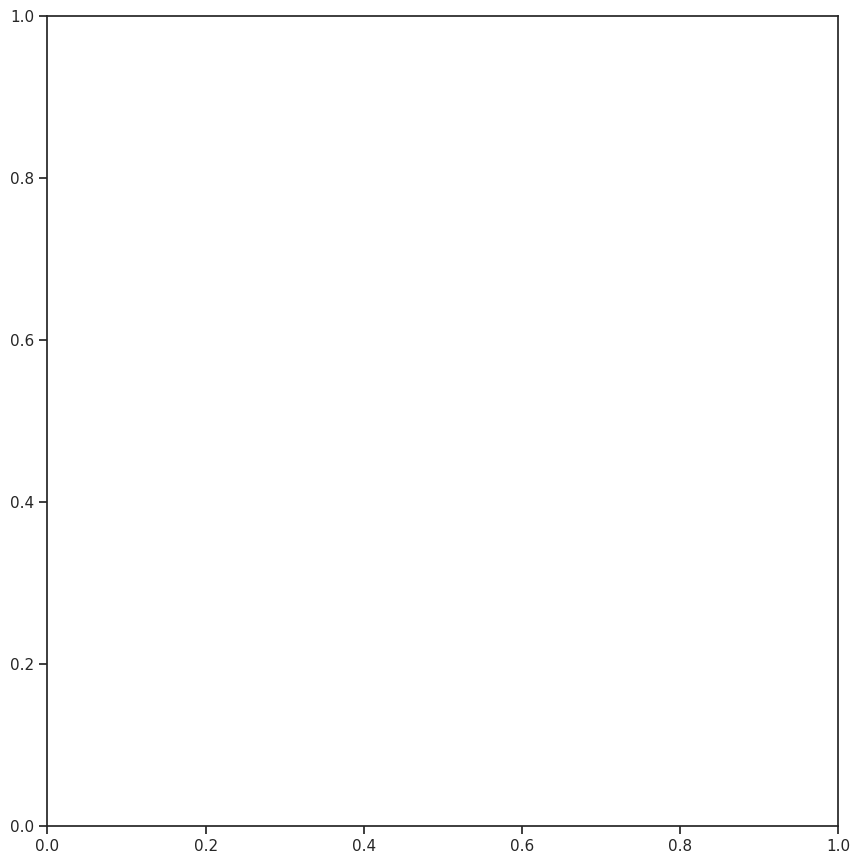

In [ ]:
AutoViz_Class().AutoViz(df)

## Sweetviz

In [ ]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 44.2 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv
# 시각화
report = sv.analyze(df)
#display the report
report.show_html('./sweetviz_report_df.html')

                                             |          | [  0%]   00:00 -> (? left)

Report ./sweetviz_report_df.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Pandas Profiling

In [ ]:
pip install -U pandas-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 13.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=45856ef83232c816b02de619da8599bfbec84d9278670e88ca782988a4dcc9ce
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import seaborn as sns

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
# profiling
import pandas as pd
import ydata_profiling
pr = df.profile_report() # 프로파일링 결과 리포트를 pr에 저장
pr.to_file('./df_report.html') # pr_report.html 파일로 저장

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# AutoML

In [ ]:
!pip install shap
# 런타임 다시 시작

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.1 MB/s eta 0:00:00
   ━━━━━

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

## PyCaret

In [ ]:
from pycaret.datasets import get_data
get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


In [ ]:
data = get_data('employee')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
print(data['left'].value_counts())
print(data['left'].value_counts(normalize = True))

left
0    11428
1     3571
Name: count, dtype: int64
left
0    0.761917
1    0.238083
Name: proportion, dtype: float64


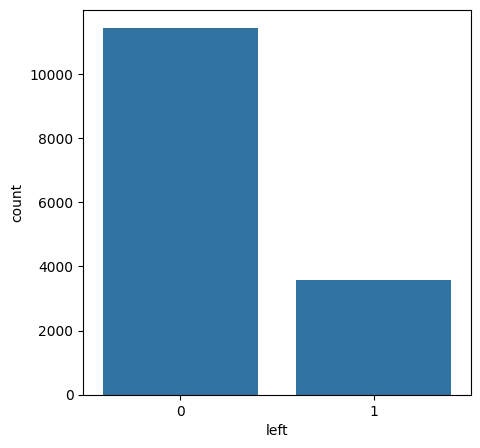

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'left', data = data, order = data['left'].value_counts().index)
plt.show()

<Axes: >

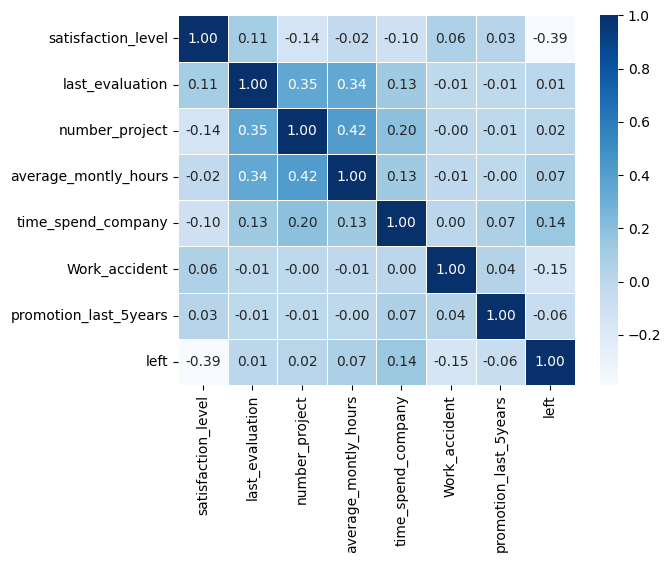

In [ ]:
sns.heatmap(data = data.drop(['salary', 'department'], axis=1).corr(),
            annot=True,
            fmt = '.2f',
            linewidths=.5,
            cmap='Blues')

### 타이타닉 데이터

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### 준비

In [ ]:
from pycaret.classification import *
setup_clf = setup(df, target = 'survived', session_id = 42)

,Description,Value
0,Session id,42
1,Target,survived
2,Target type,Binary
3,Original data shape,"(891, 15)"
4,Transformed data shape,"(891, 29)"
5,Transformed train set shape,"(623, 29)"
6,Transformed test set shape,"(268, 29)"
7,Numeric features,5
8,Categorical features,7
9,Rows with missing values,79.6%


In [ ]:
from pycaret.classification import *
from sklearn.preprocessing import *
# import imblearn
setup_clf = setup(df, target = 'survived',
                  train_size = 0.7,
                  ignore_features = ['pclass', 'adult_male', 'deck', 'embark_town', 'alive'],
                  numeric_features = ['age','fare'],
                  categorical_features = ['sex', 'embarked', 'class', 'who'],
                  # encoding_method = None,
                  normalize = True,
                  normalize_method = 'zscore',
                  # remove_outliers = True,
                  # feature_selection = True,
                  # feature_selection_method = 'classic',
                  # fix_imbalance = True,
                  # fix_imbalance_method = 'SMOTE',
                  n_jobs = - 1,
                  session_id = 42)

,Description,Value
0,Session id,42
1,Target,survived
2,Target type,Binary
3,Original data shape,"(891, 15)"
4,Transformed data shape,"(891, 16)"
5,Transformed train set shape,"(623, 16)"
6,Transformed test set shape,"(268, 16)"
7,Ignore features,5
8,Numeric features,2
9,Categorical features,4


In [ ]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:
get_config('X')

,sex,age,sibsp,parch,fare,embarked,class,who,alone
748,male,19.0,1,0,53.099998,S,First,man,False
45,male,NaN,0,0,8.050000,S,Third,man,True
28,female,NaN,0,0,7.879200,Q,Third,woman,True
633,male,NaN,0,0,0.000000,S,First,man,True
403,male,28.0,1,0,15.850000,S,Third,man,False
...,...,...,...,...,...,...,...,...,...
184,female,4.0,0,2,22.025000,S,Third,child,False
607,male,27.0,0,0,30.500000,S,First,man,True
624,male,21.0,0,0,16.100000,S,Third,man,True
103,male,33.0,0,0,8.654200,S,Third,man,True


In [ ]:
get_config('y')

,survived
748,0
45,0
28,1
633,0
403,0
...,...
184,1
607,1
624,0
103,0


In [ ]:
get_config('X_train')

,sex,age,sibsp,parch,fare,embarked,class,who,alone
748,male,19.0,1,0,53.099998,S,First,man,False
45,male,NaN,0,0,8.050000,S,Third,man,True
28,female,NaN,0,0,7.879200,Q,Third,woman,True
633,male,NaN,0,0,0.000000,S,First,man,True
403,male,28.0,1,0,15.850000,S,Third,man,False
...,...,...,...,...,...,...,...,...,...
476,male,34.0,1,0,21.000000,S,Second,man,False
190,female,32.0,0,0,13.000000,S,Second,woman,True
736,female,48.0,1,3,34.375000,S,Third,woman,False
462,male,47.0,0,0,38.500000,S,First,man,True


In [ ]:
get_config('y_train')

,survived
748,0
45,0
28,1
633,0
403,0
...,...
476,0
190,1
736,0
462,0


In [ ]:
get_config('X_test')

,sex,age,sibsp,parch,fare,embarked,class,who,alone
625,male,61.0,0,0,32.320801,S,First,man,True
566,male,19.0,0,0,7.895800,S,Third,man,True
459,male,NaN,0,0,7.750000,Q,Third,man,True
804,male,27.0,0,0,6.975000,S,Third,man,True
338,male,45.0,0,0,8.050000,S,Third,man,True
...,...,...,...,...,...,...,...,...,...
184,female,4.0,0,2,22.025000,S,Third,child,False
607,male,27.0,0,0,30.500000,S,First,man,True
624,male,21.0,0,0,16.100000,S,Third,man,True
103,male,33.0,0,0,8.654200,S,Third,man,True


In [ ]:
get_config('y_test')

,survived
625,0
566,0
459,0
804,1
338,1
...,...
184,1
607,1
624,0
103,0


In [ ]:
get_config('X_train_transformed')

,sex,age,sibsp,parch,fare,embarked_S,embarked_Q,embarked_C,class_First,class_Third,class_Second,who_man,who_woman,who_child,alone
748,0.731083,-8.476280e-01,0.562957,-0.448665,0.465738,0.629969,-0.304930,-0.498495,1.799471,-1.11763,-0.513509,0.794286,-0.654904,-0.308064,-1.284937
45,0.731083,4.488517e-08,-0.474682,-0.448665,-0.478269,0.629969,-0.304930,-0.498495,-0.555719,0.89475,-0.513509,0.794286,-0.654904,-0.308064,0.778248
28,-1.367833,4.488517e-08,-0.474682,-0.448665,-0.481848,-1.587380,3.279439,-0.498495,-0.555719,0.89475,-0.513509,-1.258993,1.526942,-0.308064,0.778248
633,0.731083,4.488517e-08,-0.474682,-0.448665,-0.646954,0.629969,-0.304930,-0.498495,1.799471,-1.11763,-0.513509,0.794286,-0.654904,-0.308064,0.778248
403,0.731083,-1.569695e-01,0.562957,-0.448665,-0.314823,0.629969,-0.304930,-0.498495,-0.555719,0.89475,-0.513509,0.794286,-0.654904,-0.308064,-1.284937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,0.731083,3.034695e-01,0.562957,-0.448665,-0.206906,0.629969,-0.304930,-0.498495,-0.555719,-1.11763,1.947385,0.794286,-0.654904,-0.308064,-1.284937
190,-1.367833,1.499898e-01,-0.474682,-0.448665,-0.374544,0.629969,-0.304930,-0.498495,-0.555719,-1.11763,1.947385,-1.258993,1.526942,-0.308064,0.778248
736,-1.367833,1.377827e+00,0.562957,3.119650,0.073362,0.629969,-0.304930,-0.498495,-0.555719,0.89475,-0.513509,-1.258993,1.526942,-0.308064,-1.284937
462,0.731083,1.301087e+00,-0.474682,-0.448665,0.159800,0.629969,-0.304930,-0.498495,1.799471,-1.11763,-0.513509,0.794286,-0.654904,-0.308064,0.778248


In [ ]:
get_config('X_test_transformed')

,sex,age,sibsp,parch,fare,embarked_S,embarked_Q,embarked_C,class_First,class_Third,class_Second,who_man,who_woman,who_child,alone
625,0.731083,2.375445e+00,-0.474682,-0.448665,0.030317,0.629969,-0.304930,-0.498495,1.799471,-1.11763,-0.513509,0.794286,-0.654904,-0.308064,0.778248
566,0.731083,-8.476280e-01,-0.474682,-0.448665,-0.481501,0.629969,-0.304930,-0.498495,-0.555719,0.89475,-0.513509,0.794286,-0.654904,-0.308064,0.778248
459,0.731083,4.488517e-08,-0.474682,-0.448665,-0.484556,-1.587380,3.279439,-0.498495,-0.555719,0.89475,-0.513509,0.794286,-0.654904,-0.308064,0.778248
804,0.731083,-2.337093e-01,-0.474682,-0.448665,-0.500796,0.629969,-0.304930,-0.498495,-0.555719,0.89475,-0.513509,0.794286,-0.654904,-0.308064,0.778248
338,0.731083,1.147608e+00,-0.474682,-0.448665,-0.478269,0.629969,-0.304930,-0.498495,-0.555719,0.89475,-0.513509,0.794286,-0.654904,-0.308064,0.778248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,-1.367833,-1.998726e+00,-0.474682,1.930212,-0.185428,0.629969,-0.304930,-0.498495,-0.555719,0.89475,-0.513509,-1.258993,-0.654904,3.246080,-1.284937
607,0.731083,-2.337093e-01,-0.474682,-0.448665,-0.007837,0.629969,-0.304930,-0.498495,1.799471,-1.11763,-0.513509,0.794286,-0.654904,-0.308064,0.778248
624,0.731083,-6.941483e-01,-0.474682,-0.448665,-0.309584,0.629969,-0.304930,-0.498495,-0.555719,0.89475,-0.513509,0.794286,-0.654904,-0.308064,0.778248
103,0.731083,2.267297e-01,-0.474682,-0.448665,-0.465609,0.629969,-0.304930,-0.498495,-0.555719,0.89475,-0.513509,0.794286,-0.654904,-0.308064,0.778248


In [ ]:
get_config('variable_and_property_keys')

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:
get_config('pipeline')

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None, include=['age', 'fare'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['sex', 'embarked', '...
                                    include=['embarked', 'class', 'who'],
                                    transformer=OneHotEncoder(cols=['embarked',
                                                                    'class',
                                                                    'who'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True)))],
         verbose=False)

### 모델 비교

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8251,0.8657,0.7199,0.8070,0.7585,0.6226,0.6273,0.2460
lightgbm,Light Gradient Boosting Machine,0.8219,0.8684,0.7453,0.7845,0.7605,0.6195,0.6238,0.3860
lr,Logistic Regression,0.8171,0.8558,0.7201,0.7923,0.7505,0.6071,0.6125,1.3460
ridge,Ridge Classifier,0.8138,0.8597,0.7201,0.7804,0.7473,0.6006,0.6034,0.2380
lda,Linear Discriminant Analysis,0.8138,0.8598,0.7201,0.7804,0.7473,0.6006,0.6034,0.1860
rf,Random Forest Classifier,0.8124,0.8478,0.7284,0.7792,0.7484,0.5996,0.6048,0.4600
ada,Ada Boost Classifier,0.8089,0.8429,0.7371,0.7669,0.7467,0.5941,0.5996,0.2430
et,Extra Trees Classifier,0.8059,0.8328,0.7370,0.7625,0.7458,0.5894,0.5933,0.5550
knn,K Neighbors Classifier,0.8026,0.8375,0.6909,0.7758,0.7260,0.5735,0.5800,0.1450
nb,Naive Bayes,0.7993,0.8451,0.7576,0.7339,0.7435,0.5793,0.5816,0.1270


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

### 모델 분석

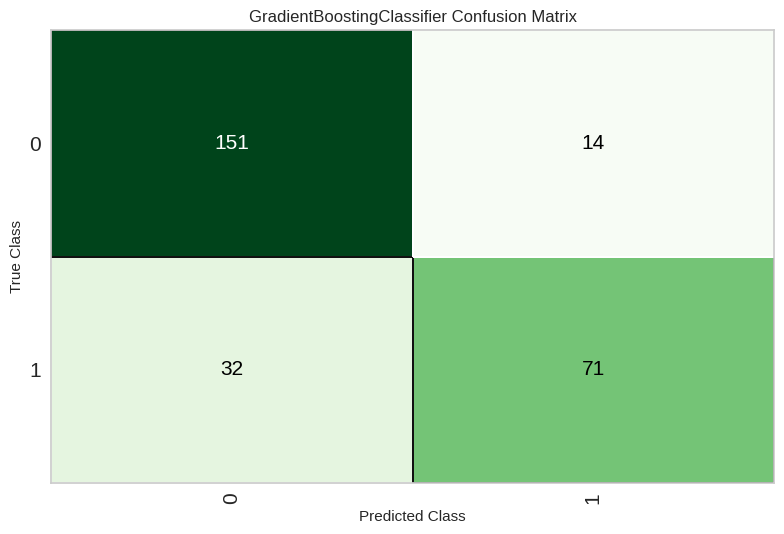

In [ ]:
plot_model(best, plot = 'confusion_matrix')

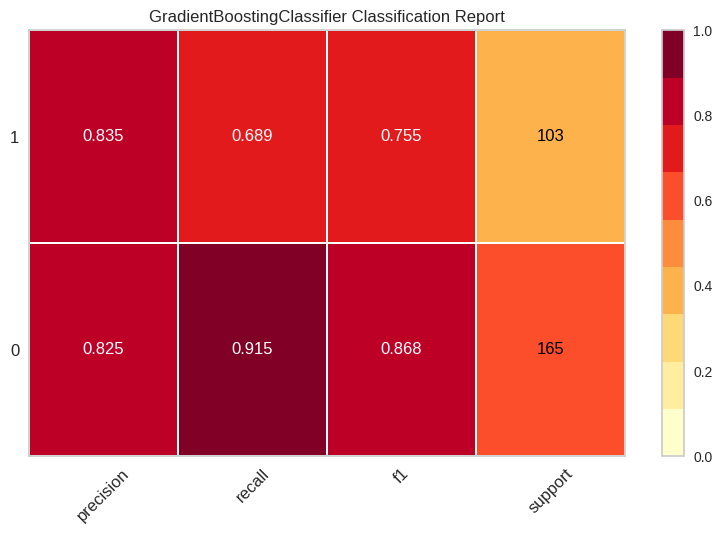

In [ ]:
plot_model(best, plot = 'class_report')

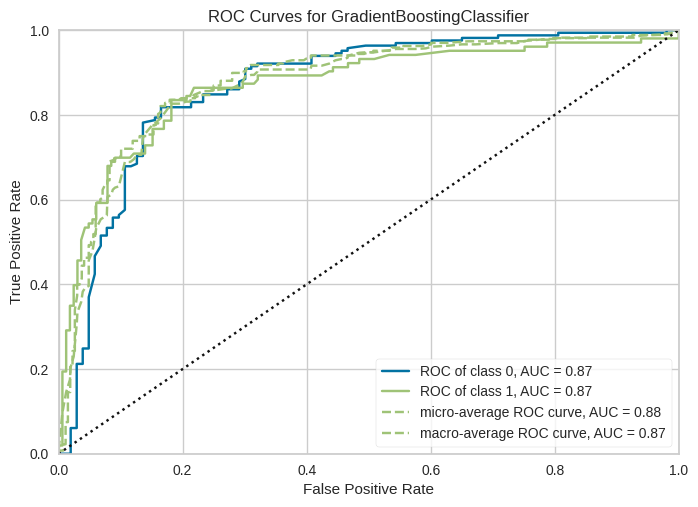

In [ ]:
plot_model(best, plot = 'auc')

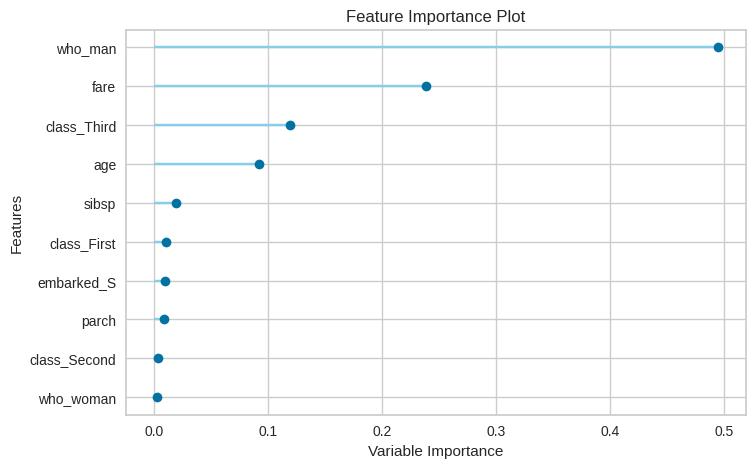

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### 예측

In [ ]:
pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8284,0.8697,0.6893,0.8353,0.7553,0.6250,0.6318


In [ ]:
pred.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived,prediction_label,prediction_score
625,male,61.0,0,0,32.320801,S,First,man,True,0,0,0.8790
566,male,19.0,0,0,7.895800,S,Third,man,True,0,0,0.9345
459,male,NaN,0,0,7.750000,Q,Third,man,True,0,0,0.7817
804,male,27.0,0,0,6.975000,S,Third,man,True,1,0,0.9807
338,male,45.0,0,0,8.050000,S,Third,man,True,1,0,0.9215


In [ ]:
new_data = df.copy()
new_data = new_data.drop(['survived', 'pclass', 'adult_male', 'deck', 'embark_town', 'alive'], axis=1)
new_data.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone
0,male,22.0,1,0,7.2500,S,Third,man,False
1,female,38.0,1,0,71.2833,C,First,woman,False
2,female,26.0,0,0,7.9250,S,Third,woman,True
3,female,35.0,1,0,53.1000,S,First,woman,False
4,male,35.0,0,0,8.0500,S,Third,man,True


In [ ]:
new_pred = predict_model(best, data = new_data)
new_pred.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,prediction_label,prediction_score
0,male,22.0,1,0,7.250000,S,Third,man,False,0,0.8657
1,female,38.0,1,0,71.283302,C,First,woman,False,1,0.9725
2,female,26.0,0,0,7.925000,S,Third,woman,True,1,0.5202
3,female,35.0,1,0,53.099998,S,First,woman,False,1,0.9657
4,male,35.0,0,0,8.050000,S,Third,man,True,0,0.9027


### 모델 해석

In [ ]:
# TypeError: This function only supports tree based models for binary classification: rf, dt, xgboost, lightgbm, et.
clf = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8814,0.8333,0.8000,0.8163,0.6995,0.6999
1,0.7778,0.8558,0.5833,0.7778,0.6667,0.5051,0.5168
2,0.7778,0.8339,0.6250,0.7500,0.6818,0.5132,0.5183
3,0.8387,0.9443,0.8696,0.7407,0.8000,0.6663,0.6723
4,0.8548,0.9035,0.7083,0.8947,0.7907,0.6819,0.6928
5,0.8710,0.8991,0.7917,0.8636,0.8261,0.7238,0.7256
6,0.8065,0.8640,0.7083,0.7727,0.7391,0.5857,0.5871
7,0.8065,0.7774,0.7083,0.7727,0.7391,0.5857,0.5871
8,0.8387,0.9002,0.8333,0.7692,0.8000,0.6652,0.6667


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

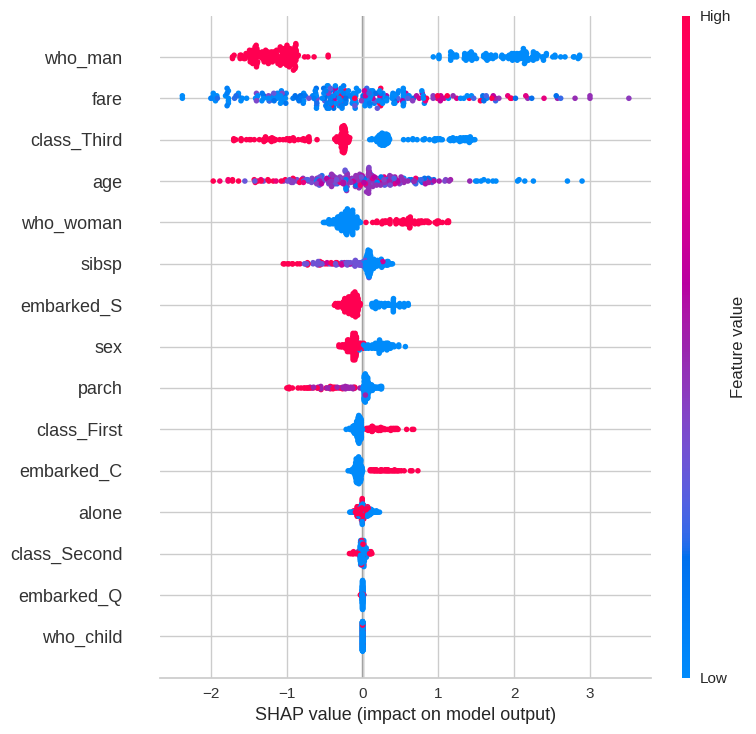

In [ ]:
interpret_model(clf, plot = 'summary')

In [ ]:
help(interpret_model)

Help on function interpret_model in module pycaret.classification.functional:

interpret_model(estimator, plot: str = 'summary', feature: Optional[str] = None, observation: Optional[int] = None, use_train_data: bool = False, X_new_sample: Optional[pandas.core.frame.DataFrame] = None, y_new_sample: Optional[pandas.core.frame.DataFrame] = None, save: Union[str, bool] = False, **kwargs)
    This function takes a trained model object and returns an interpretation plot
    based on the test / hold-out set.
    
    This function is implemented based on the SHAP (SHapley Additive exPlanations),
    which is a unified approach to explain the output of any machine learning model.
    SHAP connects game theory with local explanations.
    
    For more information: https://shap.readthedocs.io/en/latest/
    
    For more information on Partial Dependence Plot: https://github.com/SauceCat/PDPbox
    
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_d

### 모델 튜닝 및 앙상블

In [ ]:
# 모델 튜닝
tuned_model = tune_model(best, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8611,0.7500,0.8571,0.8000,0.6897,0.6934
1,0.8095,0.8873,0.6250,0.8333,0.7143,0.5758,0.5892
2,0.8413,0.8873,0.6667,0.8889,0.7619,0.6465,0.6615
3,0.8548,0.9013,0.7391,0.8500,0.7907,0.6804,0.6843
4,0.8226,0.8311,0.5833,0.9333,0.7179,0.5984,0.6335
5,0.9032,0.9063,0.7917,0.9500,0.8636,0.7896,0.7975
6,0.7903,0.8969,0.6250,0.7895,0.6977,0.5405,0.5491
7,0.8387,0.8076,0.6250,0.9375,0.7500,0.6379,0.6664
8,0.8548,0.8558,0.7083,0.8947,0.7907,0.6819,0.6928


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='log_loss', max_depth=8,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.5, min_samples_leaf=1,
                           min_samples_split=9, min_weight_fraction_leaf=0.0,
                           n_estimators=110, n_iter_no_change=None,
                           random_state=42, subsample=0.75, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
# 모델 앙상블
ensemble_model = ensemble_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.8921,0.7500,0.7826,0.7660,0.6268,0.6272
1,0.7619,0.8654,0.6250,0.7143,0.6667,0.4828,0.4854
2,0.8730,0.8488,0.7083,0.9444,0.8095,0.7172,0.7339
3,0.8548,0.9331,0.8261,0.7917,0.8085,0.6917,0.6921
4,0.8226,0.8750,0.6250,0.8824,0.7317,0.6049,0.6249
5,0.8710,0.8750,0.7917,0.8636,0.8261,0.7238,0.7256
6,0.8065,0.8991,0.7083,0.7727,0.7391,0.5857,0.5871
7,0.8387,0.7511,0.6667,0.8889,0.7619,0.6437,0.6589
8,0.8710,0.9068,0.7917,0.8636,0.8261,0.7238,0.7256


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
ensemble_model

BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='log_loss',
                                                       max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                                       n_iter_no_change=None,
                                                       random_state=42,
                                                       subsample=1.0,
                                                       tol=0.0001,
                                                       validation_fraction=0.1,
                                                       verbose=0,
                                                       warm_start=False),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=42, verbose=0,
                  warm_start=False)

In [ ]:
# 최종 모델 훈련
final_model = finalize_model(best)
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### 모델 개수 선택하여 비교

In [ ]:
model = compare_models(sort='Accuracy', fold = 5, n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8395,0.8733,0.7363,0.8279,0.7787,0.6535,0.6569,0.2820
lightgbm,Light Gradient Boosting Machine,0.8282,0.8624,0.7154,0.8203,0.7623,0.6287,0.6342,0.3420
lda,Linear Discriminant Analysis,0.8169,0.8582,0.7193,0.7869,0.7502,0.6064,0.6091,0.1320
lr,Logistic Regression,0.8154,0.8549,0.7192,0.7857,0.7484,0.6032,0.6071,0.4460
ridge,Ridge Classifier,0.8153,0.8582,0.7152,0.7862,0.7475,0.6026,0.6056,0.1820
ada,Ada Boost Classifier,0.8138,0.8450,0.7486,0.7642,0.7542,0.6045,0.6068,0.3020
rf,Random Forest Classifier,0.8090,0.8498,0.7363,0.7628,0.7479,0.5944,0.5961,0.6180
knn,K Neighbors Classifier,0.8089,0.8425,0.7028,0.7814,0.7379,0.5884,0.5926,0.3140
xgboost,Extreme Gradient Boosting,0.8009,0.8503,0.7028,0.7627,0.7305,0.5731,0.5752,2.0600
nb,Naive Bayes,0.7993,0.8455,0.7613,0.7307,0.7442,0.5793,0.5813,0.2640


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
model

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=42, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=42, reg_alpha=0.0, reg_lambda

# 파이프라인

## 유방암 데이터

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(569, 32)

In [ ]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype='int64')

In [ ]:
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [ ]:
label_encoder.classes_
# 양성, 악성

array(['B', 'M'], dtype=object)

In [ ]:
print(np.unique(y, return_counts=True))

(array([0, 1]), array([357, 212]))


In [ ]:
pd.Series(y).value_counts(normalize=True)

,proportion
0,0.627417
1,0.372583


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    stratify = y, # 클래스 분포 비율 맞추기
                                                    random_state = 42)

In [ ]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1]), array([285, 170]))
(array([0, 1]), array([72, 42]))


In [ ]:
print(pd.Series(y_train).value_counts(normalize=True))
print(pd.Series(y_test).value_counts(normalize=True))

0    0.626374
1    0.373626
Name: proportion, dtype: float64
0    0.631579
1    0.368421
Name: proportion, dtype: float64


## 파이프라인으로 변환기와 추정기 연결

In [ ]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components = 3),
                        LogisticRegression(random_state = 42))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('테스트 정확도: %.3f' % pipe_lr.score(X_test, y_test))

테스트 정확도: 0.947


## K-겹 교차 검증

In [ ]:
kfold = StratifiedKFold(n_splits = 10).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    print("k =", k)
    print("train =", train)
    print("test =", test)

k = 0
train = [ 37  40  43  45  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 

In [ ]:
kfold = StratifiedKFold(n_splits = 10).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('폴드: %2d, 클래스 분포: %s, 정확도: %.3f' % (k+1,
          np.bincount(y_train[train]), score))

print('\nCV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

폴드:  1, 클래스 분포: [256 153], 정확도: 0.957
폴드:  2, 클래스 분포: [256 153], 정확도: 0.935
폴드:  3, 클래스 분포: [256 153], 정확도: 0.978
폴드:  4, 클래스 분포: [256 153], 정확도: 1.000
폴드:  5, 클래스 분포: [256 153], 정확도: 0.935
폴드:  6, 클래스 분포: [257 153], 정확도: 0.911
폴드:  7, 클래스 분포: [257 153], 정확도: 0.956
폴드:  8, 클래스 분포: [257 153], 정확도: 1.000
폴드:  9, 클래스 분포: [257 153], 정확도: 0.933
폴드: 10, 클래스 분포: [257 153], 정확도: 0.956

CV 정확도: 0.956 +/- 0.028


In [ ]:
scores = cross_val_score(estimator = pipe_lr, X = X_train, y = y_train, cv = 10, n_jobs = -1)
print('CV 정확도 점수: %s' % scores)
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV 정확도 점수: [0.95652174 0.93478261 0.97826087 1.         0.93478261 0.91111111
 0.95555556 1.         0.93333333 0.95555556]
CV 정확도: 0.956 +/- 0.028


In [ ]:
scores = cross_validate(estimator = pipe_lr, X = X_train, y = y_train, scoring=['accuracy'],
                        cv = 10, n_jobs = -1)
print('CV 정확도 점수: %s' % scores['test_accuracy'])
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']), np.std(scores['test_accuracy'])))

CV 정확도 점수: [0.95652174 0.93478261 0.97826087 1.         0.93478261 0.91111111
 0.95555556 1.         0.93333333 0.95555556]
CV 정확도: 0.956 +/- 0.028


In [ ]:
# 스태킹(Stacking) 앙상블(Ensemble) 방법처럼 다른 모델에 주입할 훈련 데이터를 만들기 위해 사용
from sklearn.model_selection import cross_val_predict
preds = cross_val_predict(estimator=pipe_lr,
                          X=X_train,
                          y=y_train,
                          cv=10,
                          n_jobs=-1)
preds[:10]

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
from sklearn.model_selection import cross_val_predict
preds = cross_val_predict(estimator=pipe_lr,
                          X=X_train,
                          y=y_train,
                          cv=10,
                          method='predict_proba',
                          n_jobs=-1)
preds[:10]

array([[3.38861723e-01, 6.61138277e-01],
       [9.94767319e-01, 5.23268116e-03],
       [9.90892179e-01, 9.10782052e-03],
       [2.71370174e-03, 9.97286298e-01],
       [2.45881248e-03, 9.97541188e-01],
       [1.07314158e-12, 1.00000000e+00],
       [9.92151868e-01, 7.84813237e-03],
       [2.06900273e-01, 7.93099727e-01],
       [6.50351752e-01, 3.49648248e-01],
       [4.36558840e-04, 9.99563441e-01]])

## 오차 행렬

In [ ]:
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(confmat)

[[71  1]
 [ 5 37]]


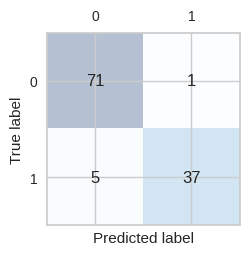

In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x = j, y = i, s = confmat[i, j], va = 'center', ha = 'center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

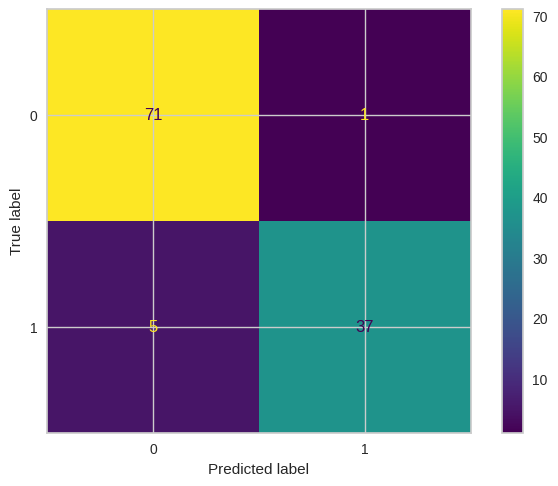

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe_lr, X_test, y_test)
plt.show()

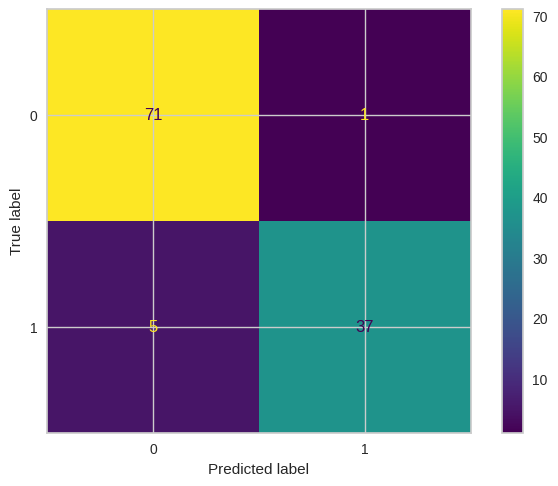

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

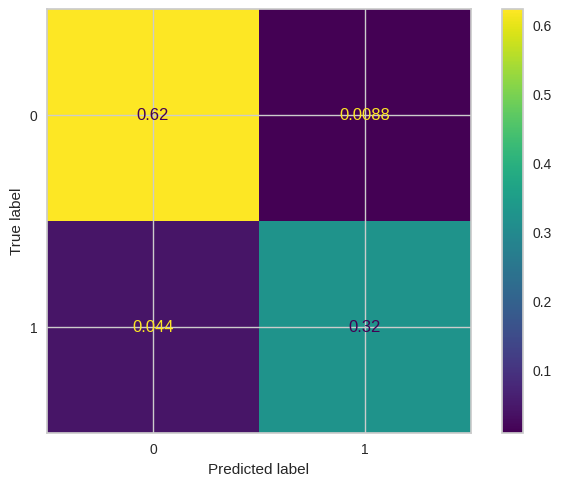

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe_lr, X_test, y_test,
                                      normalize = 'all')
plt.savefig('./confusion_matrix_normalize.png', dpi=300)
plt.show()

# 불균형한 클래스 다루기

In [ ]:
print(X.shape)
print(X[y == 0].shape)
print(X[y == 1].shape)

(569, 30)
(357, 30)
(212, 30)


In [ ]:
X_imb = np.vstack((X[y == 0], X[y == 1][:40]))
y_imb = np.hstack((y[y == 0], y[y == 1][:40]))
print(X_imb.shape)
print(y_imb.shape)

(397, 30)
(397,)


In [ ]:
y_imb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y_pred = np.zeros(y_imb.shape[0])
y_pred.shape

(397,)

In [ ]:
((397 - 40) / 397) * 100

89.92443324937027

In [ ]:
np.mean(y_pred == y_imb) * 100

89.92443324937027

In [ ]:
X_imb[y_imb == 1].shape[0]

40

In [ ]:
print(X_imb[y_imb == 1].shape)
print(y_imb[y_imb == 1].shape)

(40, 30)
(40,)


In [ ]:
X_imb[y_imb == 0].shape[0]

357

In [ ]:
print('샘플링하기 전 클래스 1의 샘플 개수:', X_imb[y_imb == 1].shape[0])

X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],
                                    y_imb[y_imb == 1],
                                    replace = True,
                                    n_samples = X_imb[y_imb == 0].shape[0],
                                    random_state = 42)

print('샘플링하기 후 클래스 1의 샘플 개수:', X_upsampled.shape[0])

샘플링하기 전 클래스 1의 샘플 개수: 40
샘플링하기 후 클래스 1의 샘플 개수: 357


In [ ]:
print(X[y == 0].shape)
print(X_upsampled.shape)

(357, 30)
(357, 30)


In [ ]:
X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

In [ ]:
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

50.0

In [ ]:
# 언더샘플링 참고
X_downsampled, y_downsampled = resample(X_imb[y_imb == 0],
                                    y_imb[y_imb == 0],
                                    replace = False,
                                    n_samples = X_imb[y_imb == 1].shape[0],
                                    random_state = 42)

# Optuna

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.8 MB/s eta 0:00:00


In [ ]:
import optuna

## 목적 함수

In [ ]:
def objective(trial):
    classifier_name = trial.suggest_categorical('classifier', ['SVC', 'RandomForest'])
    if classifier_name == 'SVC':
        svc_c = trial.suggest_float('svc_c', 0.0000000001, 10000000000, log=True)
        classifier_obj = svm.SVC(C=svc_c, gamma='auto')
    else:
        rf_max_depth = int(trial.suggest_float('rf_max_depth', 2, 32, log=True))
        classifier_obj = RandomForestClassifier(max_depth=rf_max_depth, n_estimators=10)

    accuracy = cross_val_score(classifier_obj, X_train, y_train, cv = 5).mean()
    return accuracy

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2024-12-24 07:20:41,008] A new study created in memory with name: no-name-efad165b-bdd4-4d65-99c0-0c8f9acd678a
[I 2024-12-24 07:20:41,578] Trial 0 finished with value: 0.945054945054945 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 3.6532777221756048}. Best is trial 0 with value: 0.945054945054945.
[I 2024-12-24 07:20:41,984] Trial 1 finished with value: 0.6263736263736264 and parameters: {'classifier': 'SVC', 'svc_c': 0.25937534729428535}. Best is trial 0 with value: 0.945054945054945.
[I 2024-12-24 07:20:42,218] Trial 2 finished with value: 0.6263736263736264 and parameters: {'classifier': 'SVC', 'svc_c': 1.2368920315518702e-09}. Best is trial 0 with value: 0.945054945054945.
[I 2024-12-24 07:20:42,717] Trial 3 finished with value: 0.9516483516483518 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 5.075633586615076}. Best is trial 3 with value: 0.9516483516483518.
[I 2024-12-24 07:20:43,236] Trial 4 finished with value: 0.6263736263736264 and parame

In [ ]:
# 시행된 trial 중 최적의 하이퍼파라미터 반환하는 메소드
print(study.best_trial.params)

# 시행된 trial 중 가장 높은 값 반환하는 메소드
optuna_acc = study.best_trial.value
print(optuna_acc)

{'classifier': 'RandomForest', 'rf_max_depth': 8.310195622510744}
0.9714285714285715


In [ ]:
# Optuna 내장 시각화 코드
# 하이퍼파라미터별 중요도를 확인할 수 있는 그래프
optuna.visualization.plot_param_importances(study)

In [ ]:
# 하이퍼파라미터 최적화 과정을 확인 = 매 trial 마다 loss 가 어떻게 감소되었는지 확인
optuna.visualization.plot_optimization_history(study)

In [ ]:
def objective(trial):
  params = {
            'max_depth': trial.suggest_int('max_depth', 2, 50),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 100),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 100),
            'n_estimators': trial.suggest_int('n_estimators', 10, 20)
          }

  model = RandomForestClassifier(n_jobs=-1, random_state=42,
                                 **params)

  model.fit(X_train, y_train)
  score = cross_val_score(model, X_train, y_train, cv=10, scoring = "accuracy")
  score_mean = score.mean()
  return score_mean

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2024-12-24 07:30:25,005] A new study created in memory with name: no-name-be14849f-3233-4b31-9a77-d4d1521ec7cf
[I 2024-12-24 07:30:25,863] Trial 0 finished with value: 0.933864734299517 and parameters: {'max_depth': 50, 'min_samples_leaf': 45, 'min_samples_split': 82, 'n_estimators': 20}. Best is trial 0 with value: 0.933864734299517.
[I 2024-12-24 07:30:26,522] Trial 1 finished with value: 0.925024154589372 and parameters: {'max_depth': 8, 'min_samples_leaf': 53, 'min_samples_split': 100, 'n_estimators': 13}. Best is trial 0 with value: 0.933864734299517.
[I 2024-12-24 07:30:27,289] Trial 2 finished with value: 0.9470531400966185 and parameters: {'max_depth': 49, 'min_samples_leaf': 19, 'min_samples_split': 80, 'n_estimators': 18}. Best is trial 2 with value: 0.9470531400966185.
[I 2024-12-24 07:30:28,445] Trial 3 finished with value: 0.9272946859903382 and parameters: {'max_depth': 15, 'min_samples_leaf': 68, 'min_samples_split': 93, 'n_estimators': 19}. Best is trial 2 with value

In [ ]:
# 시행된 trial 중 최적의 하이퍼파라미터 반환하는 메소드
print(study.best_trial.params)

# 시행된 trial 중 가장 높은 값 반환하는 메소드
optuna_acc = study.best_trial.value
print(optuna_acc)

{'max_depth': 25, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 20}
0.9515458937198067


In [ ]:
# Optuna 내장 시각화 코드
# 하이퍼파라미터별 중요도를 확인할 수 있는 그래프
optuna.visualization.plot_param_importances(study)

In [ ]:
# 하이퍼파라미터 최적화 과정을 확인 = 매 trial 마다 loss 가 어떻게 감소되었는지 확인
optuna.visualization.plot_optimization_history(study)